<a href="https://colab.research.google.com/github/veronica1908/FINANZAS_E4_AIII/blob/main/b_Limpieza_Transformacion_A_Exploratorio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Módulo 4. Aplicaciones de la analítica en las finanzas

CÉSAR IVÁN ÁVILA DÍAZ

VERÓNICA ANDREA MORALES GONZÁLEZ

Analítica 3

2024-1

REPOSITORIO: https://github.com/veronica1908/FINANZAS_E4_AIII

#Paquetes y librerías

In [ ]:
## Instalar bibliotecas necesarias
!pip install sqlalchemy
!pip install mysql-connector-python
!pip install sweetviz

In [ ]:
# Importar bibliotecas
import pandas as pd
import sqlite3
import plotly.graph_objects as go
import plotly.express as px
from sqlalchemy import create_engine
import urllib.request
import matplotlib.pyplot as plt
import seaborn as sns
import sweetviz as sv
from datetime import datetime
import numpy as np

# Carga y visualización de los datos

In [ ]:
# Cargar la base de expuestos
bd_expuestos = pd.read_csv('https://raw.githubusercontent.com/veronica1908/FINANZAS_E4_AIII/main/BD_Expuestos.txt', sep='\t', header=0, encoding='latin1')

# Cargar la base sociodemográfica
bd_sociodem = pd.read_csv('https://raw.githubusercontent.com/veronica1908/FINANZAS_E4_AIII/main/BD_Sociodemograficas.txt', sep='\t', header=0, encoding='latin1')

# Cargar la base de siniestros
bd_siniestros = pd.read_csv('https://media.githubusercontent.com/media/veronica1908/FINANZAS_E4_AIII/main/DB_Siniestros.txt', sep=',', header=0, encoding='latin1')

In [ ]:
#Visualizamos la base de EXPUESTOS

print('Existen en total ', len(bd_expuestos.columns), 'columnas en la base de datos.')
print("\nPrimeras filas de la base de expuestos:")
print(bd_expuestos.head())

print("\nInformación de la base de expuestos:")
print(bd_expuestos.info())

# Ordenar las columnas por cantidad de datos nulos de mayor a menor
print("Variables con  datos nulos:")
sorted_null_values = bd_expuestos.isnull().sum().sort_values(ascending=False)

# Mostrar los resultados
print(sorted_null_values)

Existen en total  5 columnas en la base de datos.

Primeras filas de la base de expuestos:
   Asegurado_Id  Poliza_Asegurado_Id FECHA_INICIO FECHA_CANCELACION  \
0      16286173            125696117   2018/01/01        2018/04/10   
1      11885152            141320760   2018/01/01               NaN   
2        763957            162532851   2018/01/01               NaN   
3      29082204            154620473   2018/01/01        2018/04/19   
4       4567640             93633862   2018/01/01               NaN   

    FECHA_FIN  
0  2018/04/10  
1  2019/12/31  
2  2019/12/31  
3  2018/04/19  
4  2019/12/31  

Información de la base de expuestos:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300900 entries, 0 to 300899
Data columns (total 5 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   Asegurado_Id         300900 non-null  int64 
 1   Poliza_Asegurado_Id  300900 non-null  int64 
 2   FECHA_INICIO         300900 non-n

In [ ]:
#Visualizamos la base SOCIODEMOGRÁFICA

print('Existen en total ', len(bd_sociodem.columns), 'columnas en la base de datos.')
print("\nPrimeras filas de la base sociodemográfica:")
print(bd_sociodem.head())

print("\nInformación de la base sociodemográfica:")
print(bd_sociodem.info())

# Ordenar las columnas por cantidad de datos nulos de mayor a menor
print("Variables con  datos nulos:")
sorted_null_values = bd_sociodem.isnull().sum().sort_values(ascending=False)

# Mostrar los resultados
print(sorted_null_values)

Existen en total  9 columnas en la base de datos.

Primeras filas de la base sociodemográfica:
   Asegurado_Id  Mujer FechaNacimiento    Ciudad  CANCER  EPOC  DIABETES  \
0      18686469      1      17/01/1984    Bogota       0     0         0   
1      16087775      0      12/03/1984  Medellin       0     0         0   
2      35757761      1      19/12/1993    Bogota       0     0         0   
3      48691460      0      14/11/2000    Bogota       0     0         0   
4      36074099      1       6/08/2015      Cali       0     0         0   

   HIPERTENSION  ENF_CARDIOVASCULAR  
0             0                   0  
1             0                   0  
2             0                   0  
3             0                   0  
4             0                   0  

Información de la base sociodemográfica:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267312 entries, 0 to 267311
Data columns (total 9 columns):
 #   Column              Non-Null Count   Dtype 
---  ------        

In [ ]:
#Visualizamos la base de SINIESTROS

print('Existen en total ', len(bd_siniestros.columns), 'columnas en la base de datos.')
print("\nPrimeras filas de la base de siniestros:")
print(bd_siniestros.head())

print("\nInformación de la base de siniestros:")
print(bd_siniestros.info())

# Ordenar las columnas por cantidad de datos nulos de mayor a menor
print("Variables con  datos nulos:")
sorted_null_values = bd_siniestros.isnull().sum().sort_values(ascending=False)

# Mostrar los resultados
print(sorted_null_values)

Existen en total  7 columnas en la base de datos.

Primeras filas de la base de siniestros:
   Mes_Pago  Asegurado_Id              Reclamacion Diagnostico_Codigo  \
0    201803       4834968  EXAMENES DE DIAGNOSTICO               Z011   
1    201909      14915125  EXAMENES DE DIAGNOSTICO                  9   
2    201807      42959949  EXAMENES DE DIAGNOSTICO                  9   
3    201803      30540131         CONSULTA EXTERNA                  9   
4    201905      21442420      LABORATORIO CLINICO                  9   

                     Diagnostico_Desc  Eventos  Valor_Pagado  
0  EXAMEN DE OÃDOS Y DE LA AUDICIÃN        1  4.953413e+05  
1              DIAGNÃSTICO PENDIENTE        1  4.229947e+05  
2              DIAGNÃSTICO PENDIENTE        1  1.085708e+06  
3              DIAGNÃSTICO PENDIENTE        1  4.131626e+05  
4              DIAGNÃSTICO PENDIENTE       18  1.093855e+06  

Información de la base de siniestros:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33

#Exploración inicial de las variables de las bases para identificar necesidades de limpieza y transformación

##Expuestos

                                             |          | [  0%]   00:00 -> (? left)


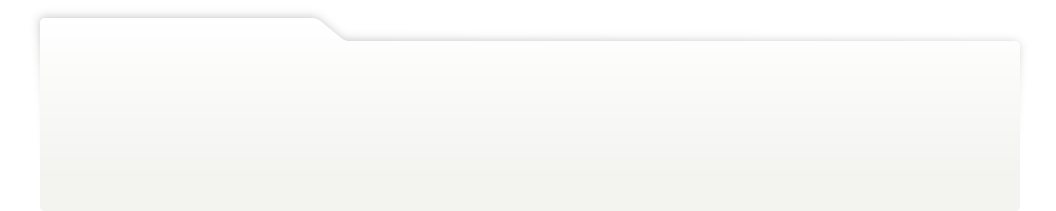
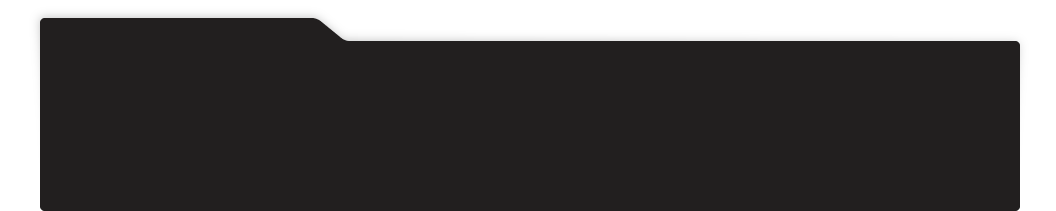
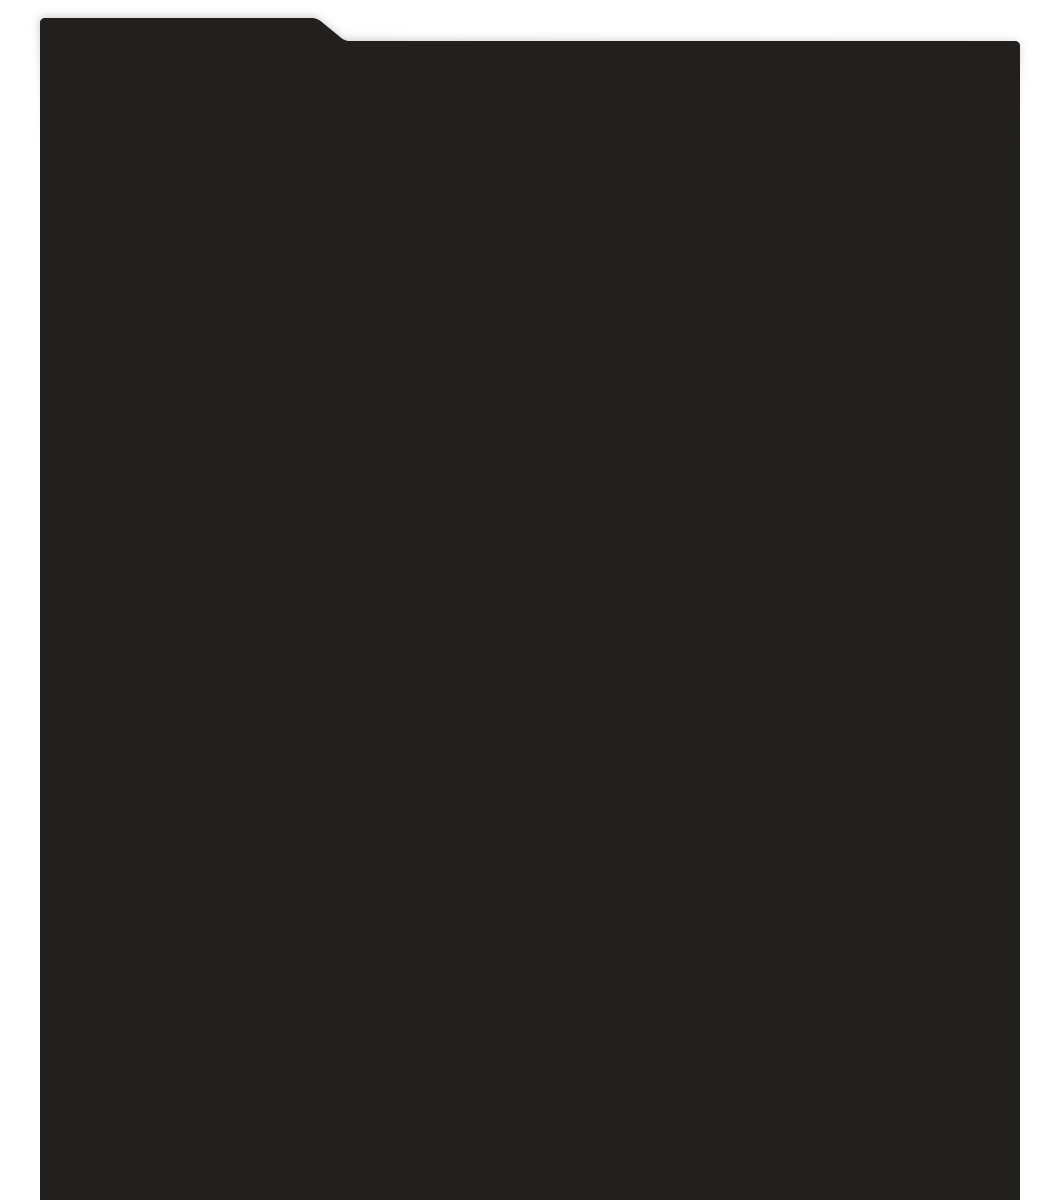
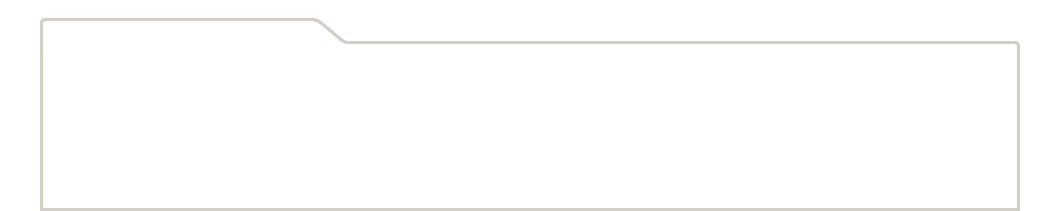
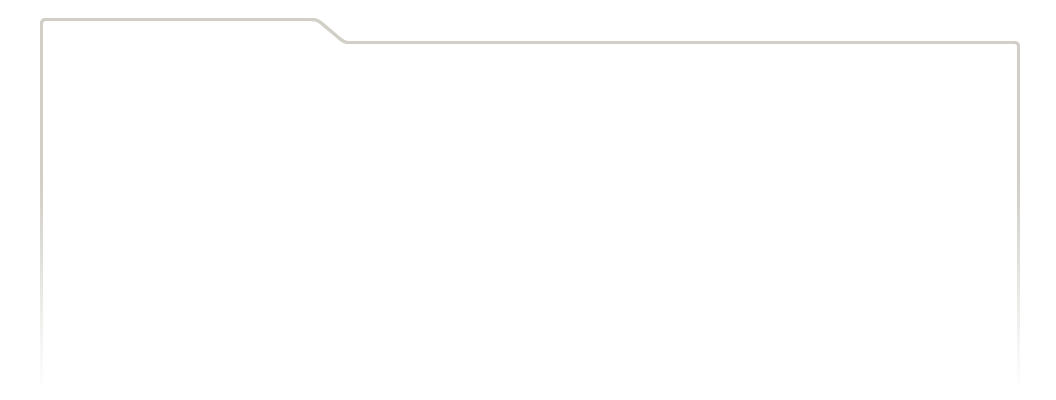
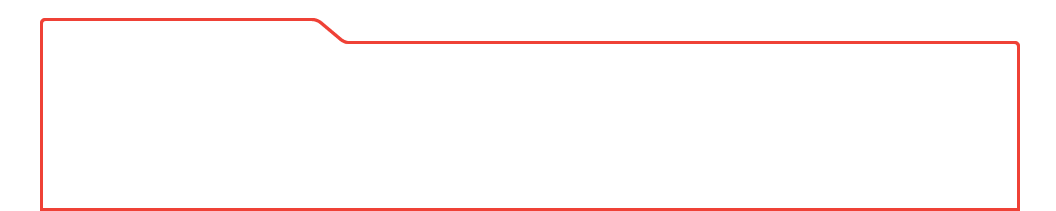
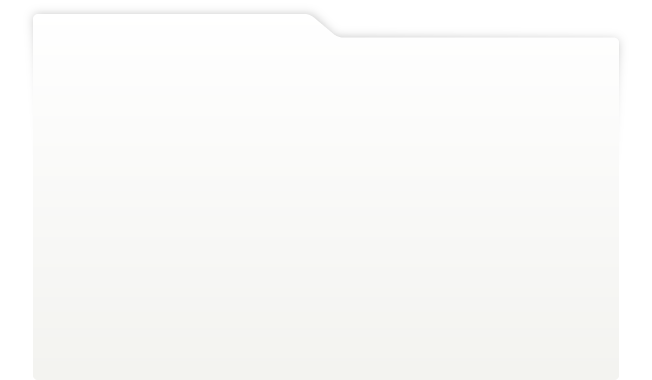
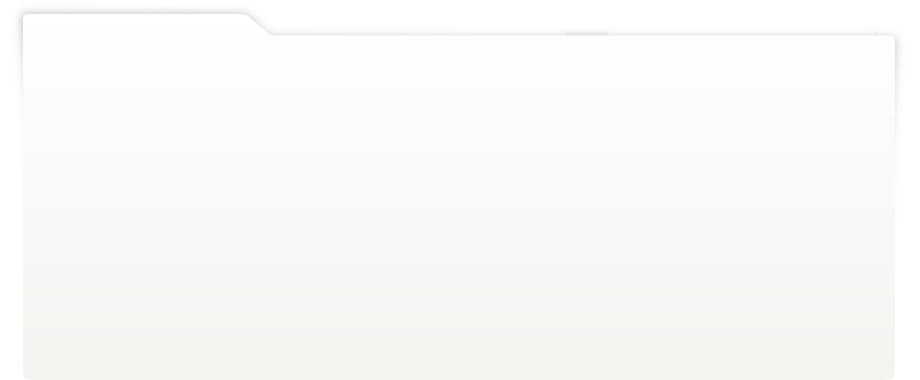
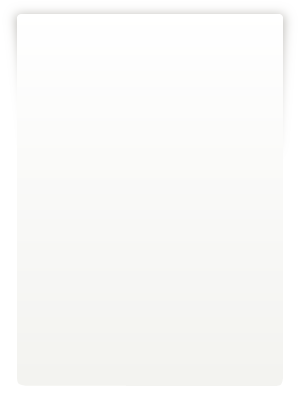
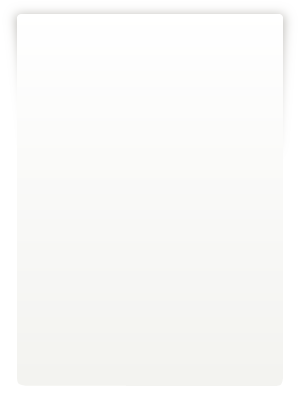
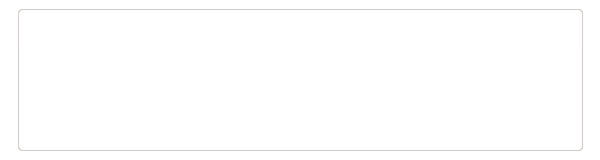
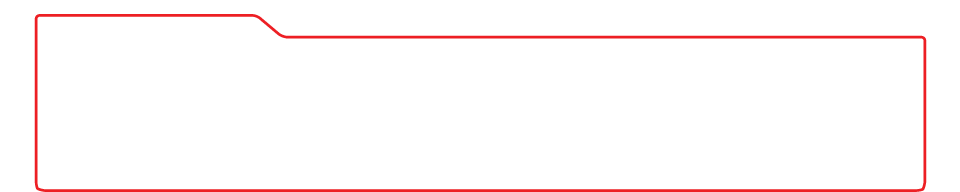
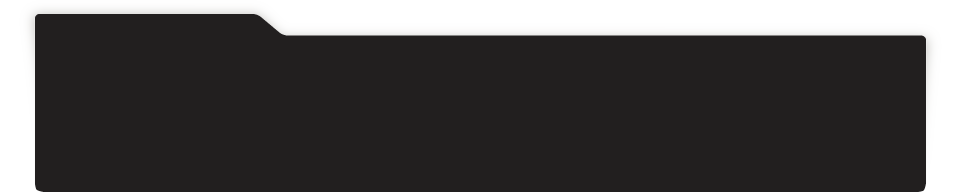
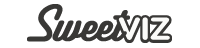
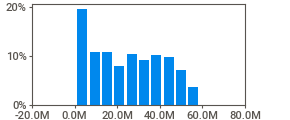
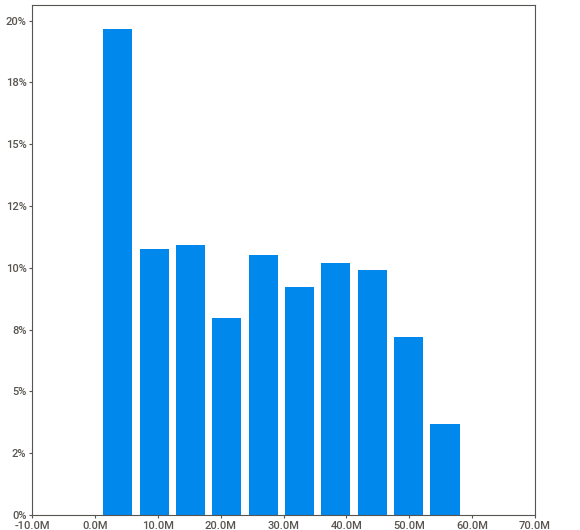
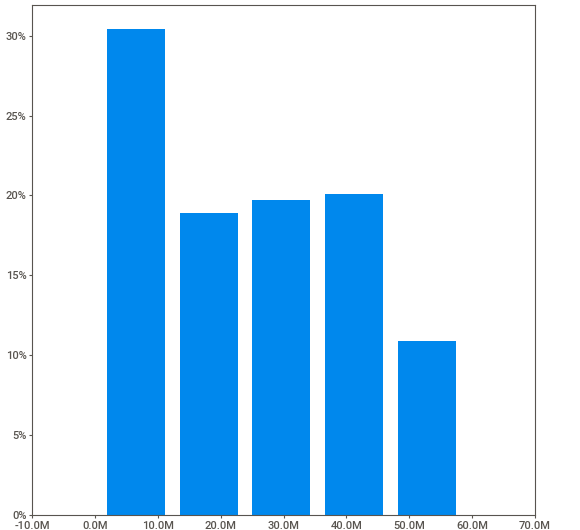
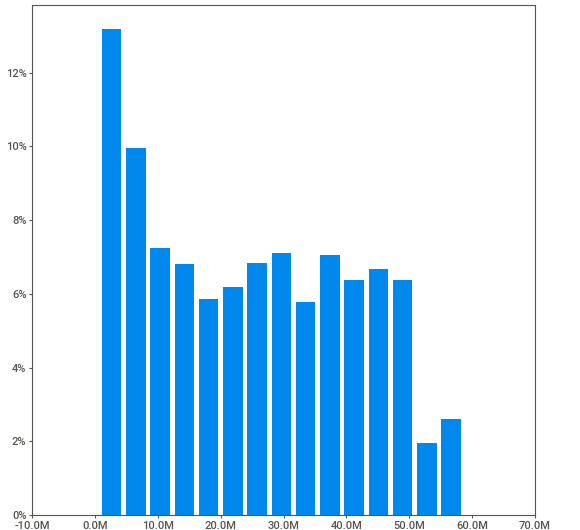
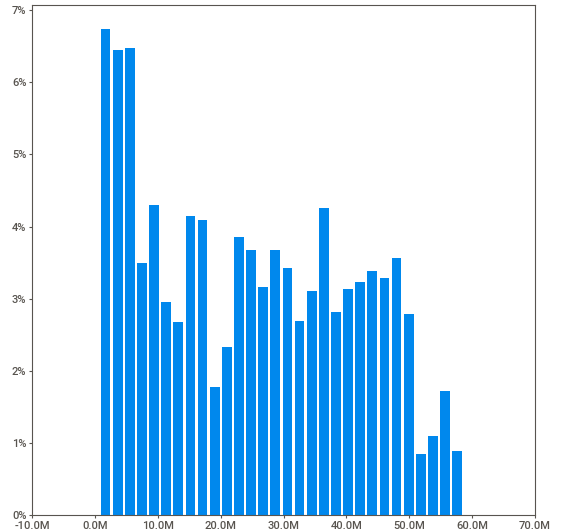
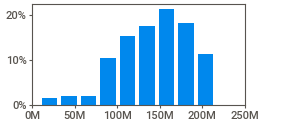
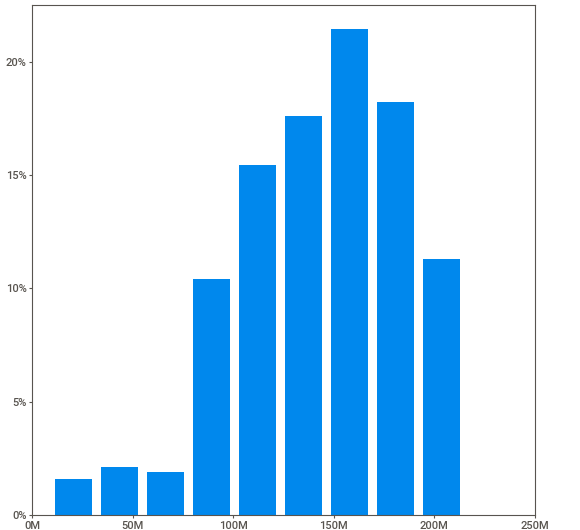
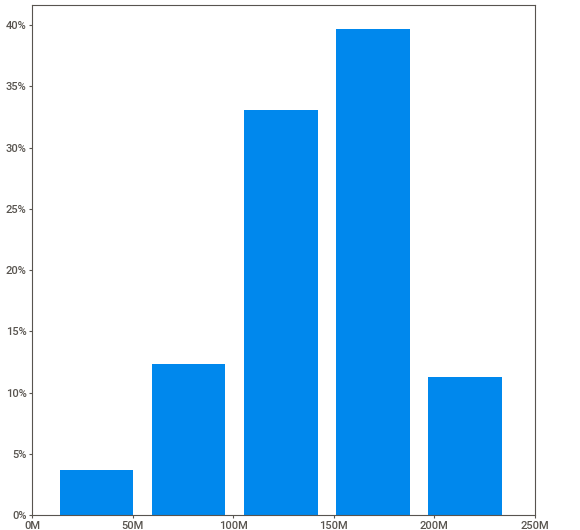
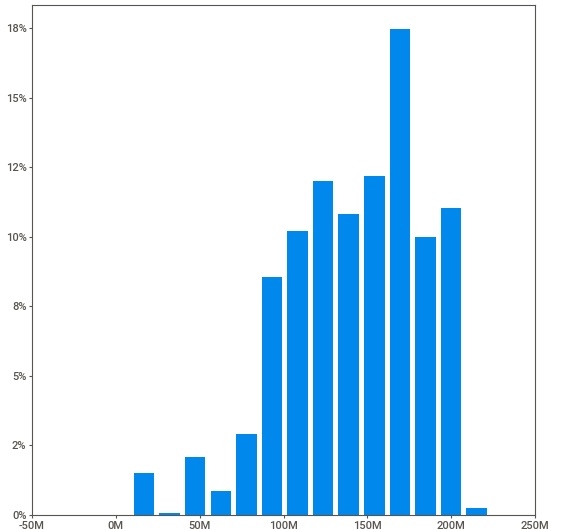
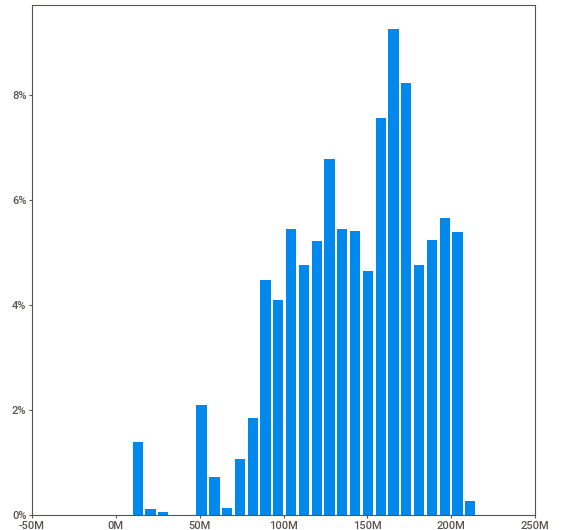
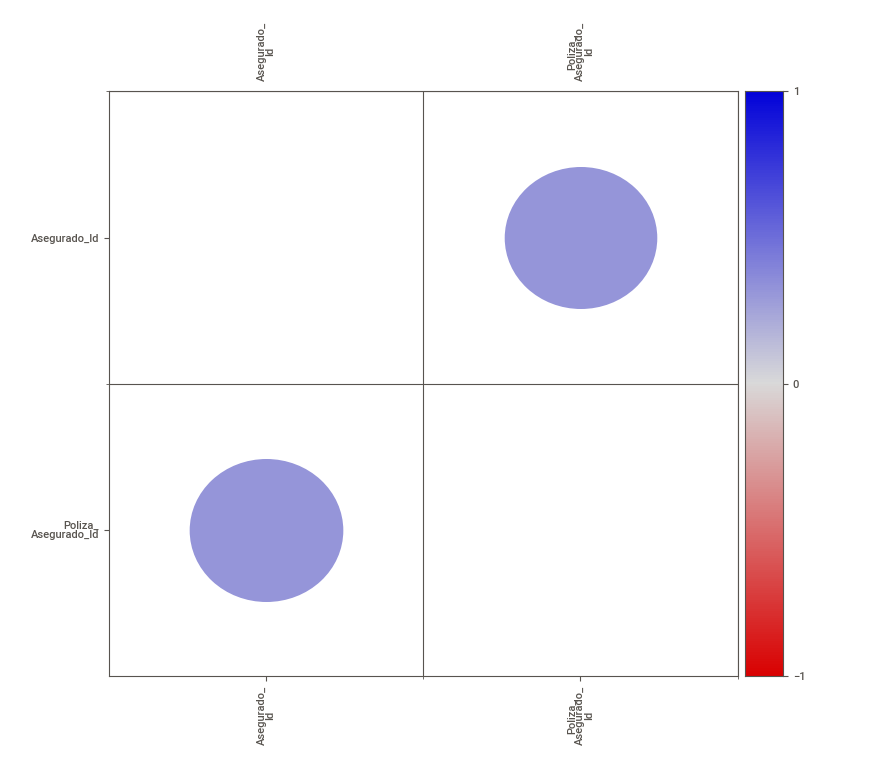
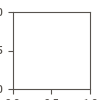

In [ ]:
#Exploración rápida de las variables de bd_expuestos
rgd = sv.analyze(bd_expuestos)
rgd.show_notebook()

De esta exploración inicial, se muestra que hay 300900 asegurados.
Se muestra la fecha de inicio y de fin de vigencia de la póliza y también hay fecha de cancelación para algunas de las pólizas, las que no han sido canceladas se encuentran vacías, po lo que las trataremos a continuación.

In [ ]:
#Ajustamos las columnas de fecha a datatime
bd_expuestos['FECHA_INICIO'] = pd.to_datetime(bd_expuestos['FECHA_INICIO'])
bd_expuestos['FECHA_CANCELACION'] = pd.to_datetime(bd_expuestos['FECHA_CANCELACION'])
bd_expuestos['FECHA_FIN'] = pd.to_datetime(bd_expuestos['FECHA_FIN'])

##Sociodemográfica

                                             |          | [  0%]   00:00 -> (? left)


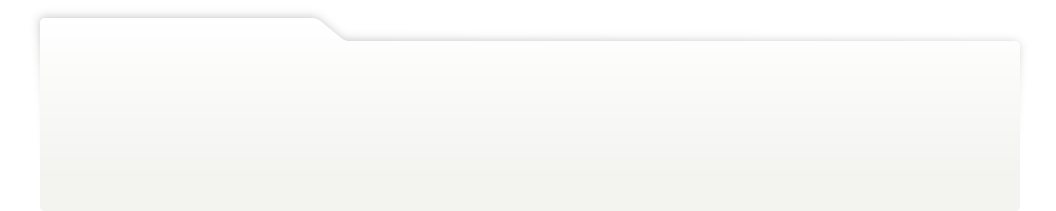
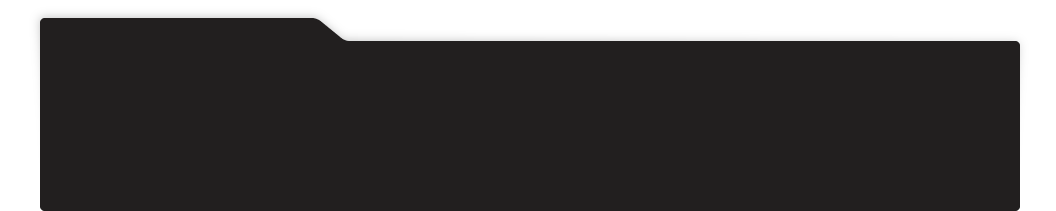
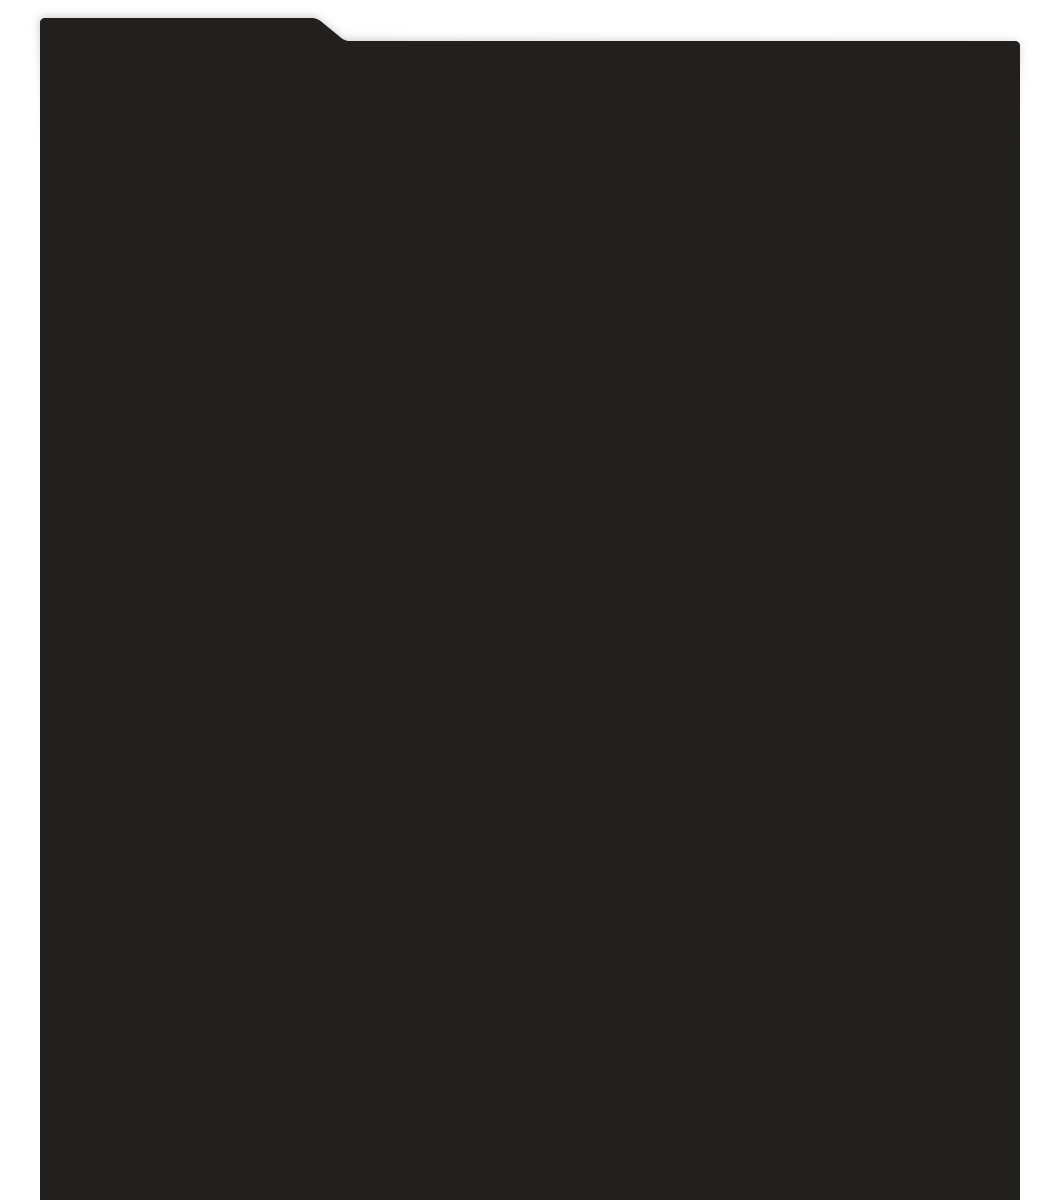
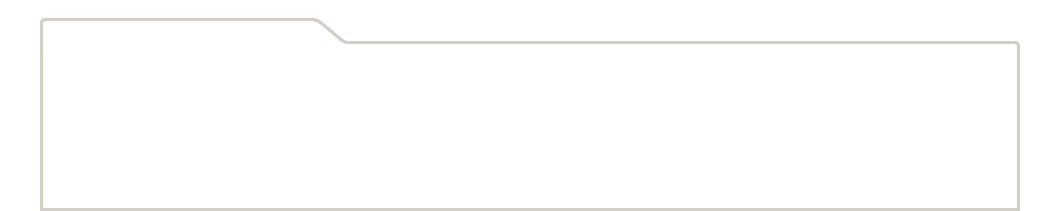
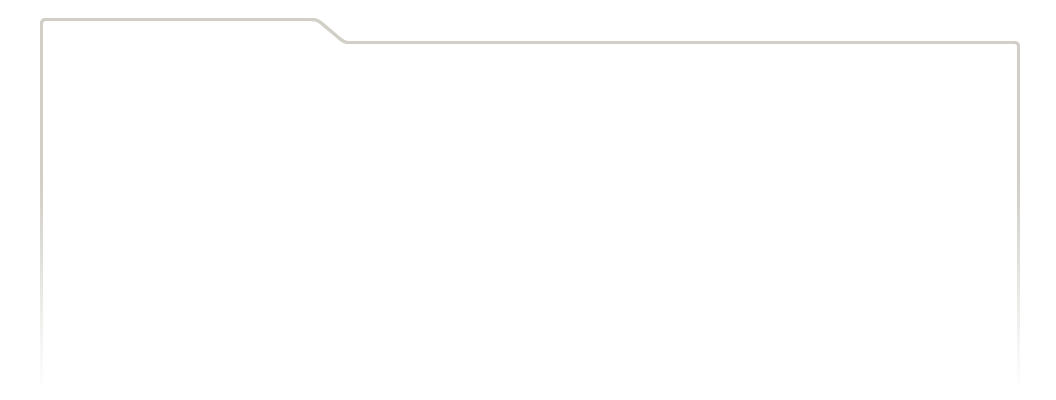
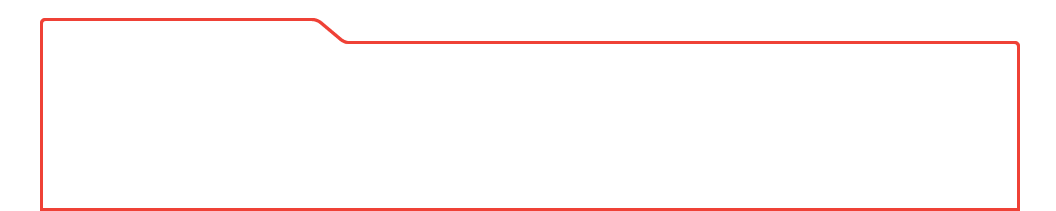
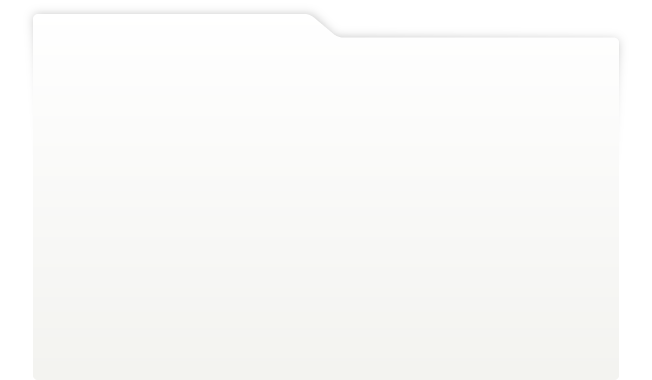
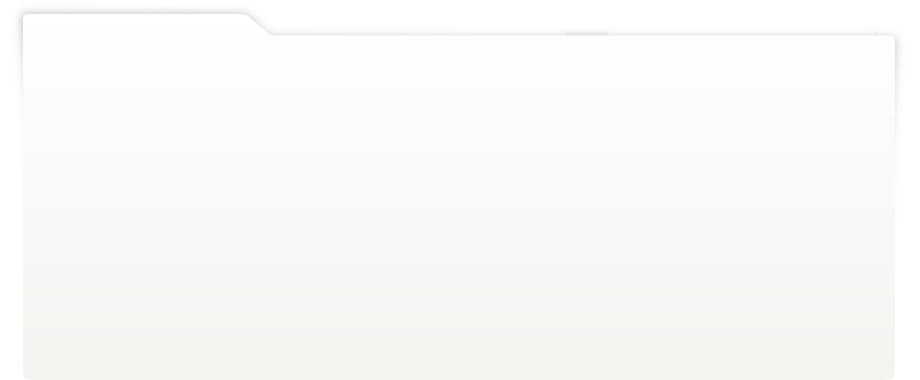
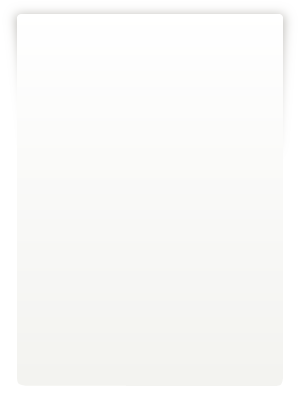
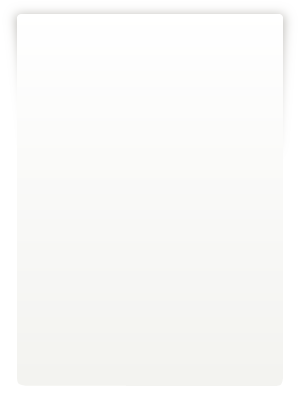
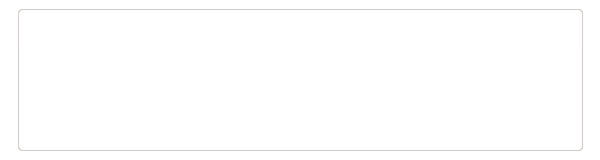
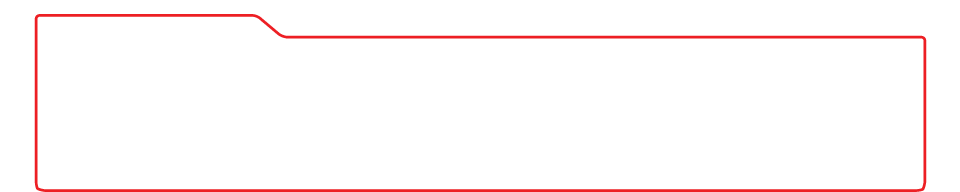
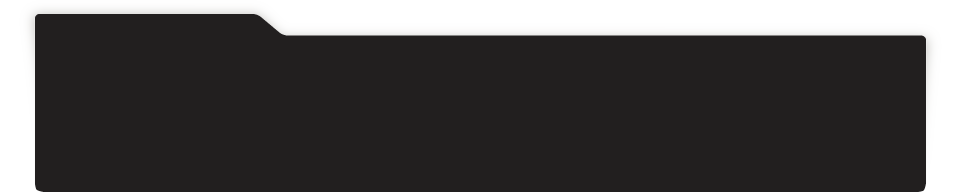
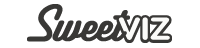
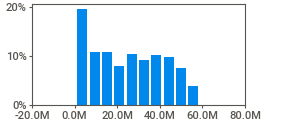
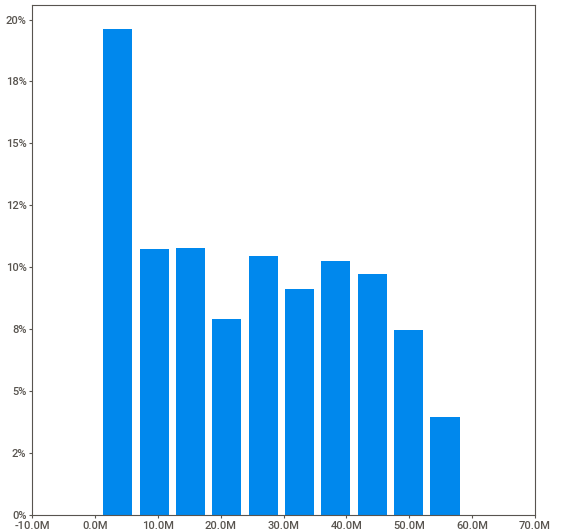
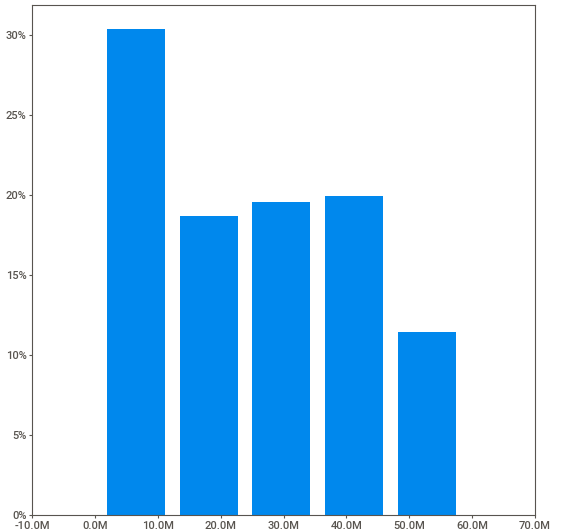
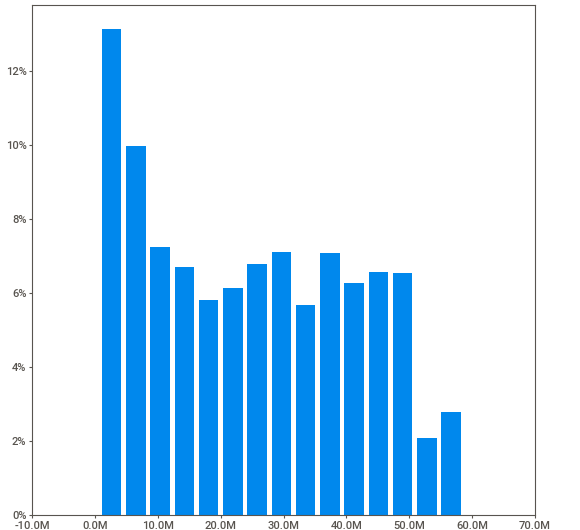
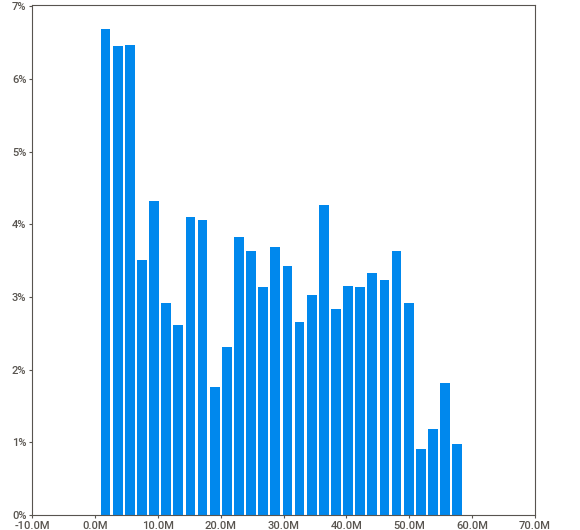
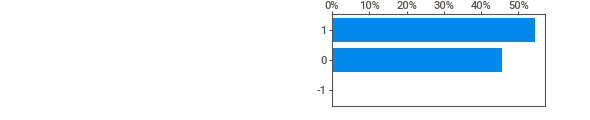
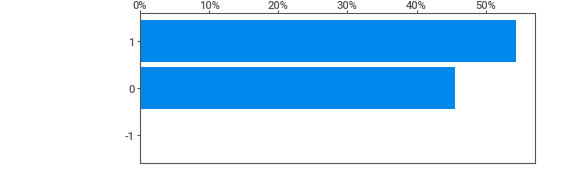
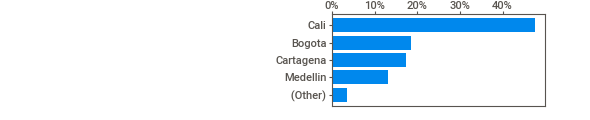
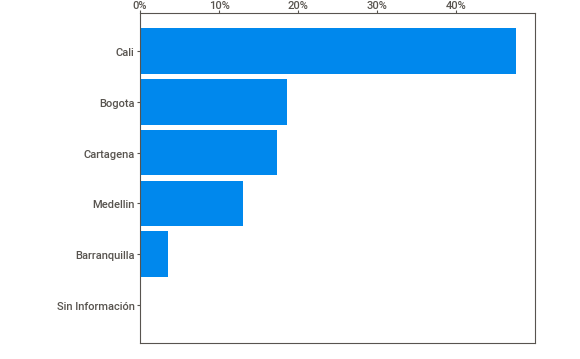
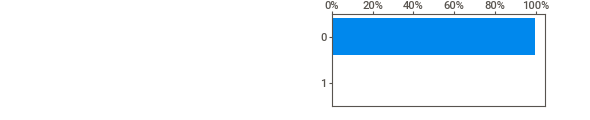
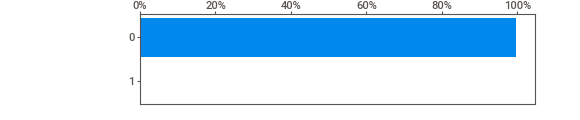
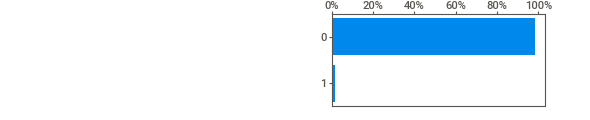
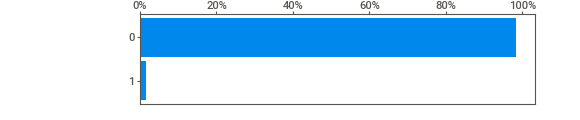
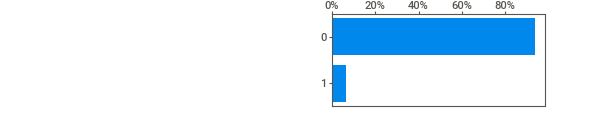
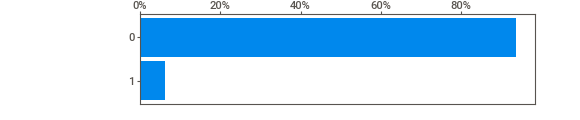
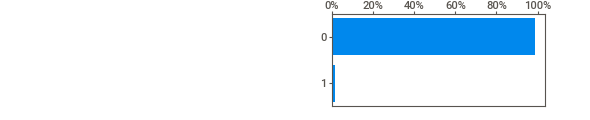
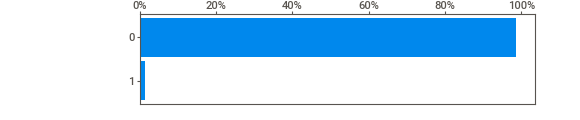
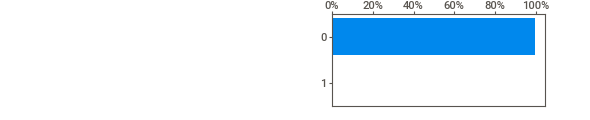
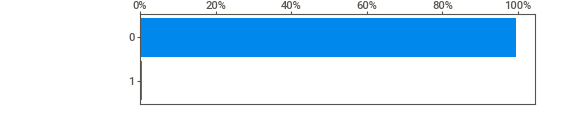
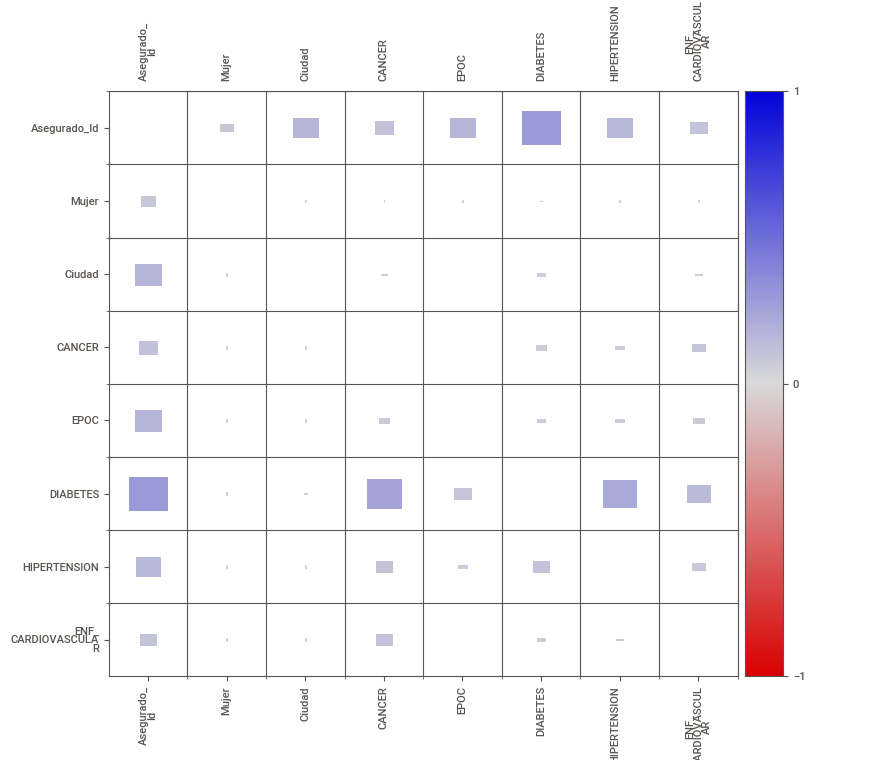
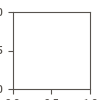

In [ ]:
#Exploración rápida de las variables sociodemográficas
rgd = sv.analyze(bd_sociodem)
rgd.show_notebook()

 En el aspecto sociodemográfico de los asegurados, se tiene los datos de 267233 personas, cantidad inferior a los expuestos, por lo que se hará un cruce entre estas bases de datos para obtener la información completa.
 - El 54% de los asegurados son mujeres, 46% hombres y hay 5 registros con asignación -1, por lo que se eliminarán de la base.
 - Se tiene la fecha de nacimiento, a partir de la cual se calculará la edad al cierre del 31 de diciembre de 2019.
 - En cuanto a la ciudad en la que se encuentran los asegurados, se tiene que el 48% está en Cali, 19& en Bogotá, 17% en Cartagena, 13% en Medellín, 3% en Barranquilla y se tiene menos del 1% (73 registros), sin información.
 - Más del 99% de los asegurados no tienen cáncer, solo 925 de ellos tienen esta enfermedad.
 - El 98% no tiene EPOC.
 - El 6% tiene diabetes.
 - Solo el 1% sufre de hipertensión.
 - Menos del 1% dufre alguna enfermedad cardiovascular.


In [ ]:
# Eliminar los registros con valor -1 en la columna 'Mujer'
bd_sociodem.drop(bd_sociodem[bd_sociodem['Mujer'] == -1].index, inplace=True)

In [ ]:
#Desde la visualización inicial, se detectó datos vacíos en la variable de CIUDAD, como ya hay una categoría sin información, se agregarán los vacíos a esta categoría.

bd_sociodem['Ciudad'].fillna('Sin Información', inplace=True)

# Verificamos las categorías
categorias = bd_sociodem['Ciudad'].unique()
print("Categorías de ciudad:", categorias)

# Verificamos datos nulos
nulos_ciudad = bd_sociodem['Ciudad'].isnull().sum()
print("Datos nulos en la columna 'Ciudad':", nulos_ciudad)


Categorías de ciudad: ['Bogota' 'Medellin' 'Cali' 'Cartagena' 'Barranquilla' 'Sin Información']
Datos nulos en la columna 'Ciudad': 0


In [ ]:
#Vamos a unir las tablas expuestos y sociodemográfica con el filtro de los asegurados registrados en la segunda base.

# Aplicar el filtro de asegurados registrados en la base sociodemográfica
asegurados_registrados = bd_sociodem['Asegurado_Id'].unique()

# Filtrar las filas de 'expuestos' que corresponden a los asegurados registrados en la base sociodemográfica
expuestos_filtrados = bd_expuestos[bd_expuestos['Asegurado_Id'].isin(asegurados_registrados)]

# Realizar la unión (merge) entre 'expuestos_filtrados' y 'sociodemografica' en función de 'Asegurado_Id'
BD_EXP_SOCIOD = pd.merge(expuestos_filtrados, bd_sociodem, on='Asegurado_Id', how='inner')

# Mostrar las dimensiones de la nueva base
print("Dimensiones de la nueva base de datos:", BD_EXP_SOCIOD.shape)

# Verificar si todos los valores en la columna 'Asegurado_Id' son únicos
if BD_EXP_SOCIOD['Asegurado_Id'].nunique() == BD_EXP_SOCIOD.shape[0]:
    print("Todos los valores en la columna 'Asegurado_Id' son únicos.")
else:
    print("Hay valores duplicados en la columna 'Asegurado_Id'.")

print (BD_EXP_SOCIOD.head())

Dimensiones de la nueva base de datos: (301070, 13)
Hay valores duplicados en la columna 'Asegurado_Id'.
   Asegurado_Id  Poliza_Asegurado_Id FECHA_INICIO FECHA_CANCELACION  \
0      16286173            125696117   2018-01-01        2018-04-10   
1      11885152            141320760   2018-01-01               NaT   
2        763957            162532851   2018-01-01               NaT   
3      29082204            154620473   2018-01-01        2018-04-19   
4       4567640             93633862   2018-01-01               NaT   

   FECHA_FIN  Mujer FechaNacimiento     Ciudad  CANCER  EPOC  DIABETES  \
0 2018-04-10      0      19/05/1983       Cali       0     0         0   
1 2019-12-31      0       4/07/1974     Bogota       0     0         0   
2 2019-12-31      0      10/02/1968   Medellin       0     0         0   
3 2018-04-19      1       2/10/1974  Cartagena       0     0         0   
4 2019-12-31      1      30/05/1966     Bogota       0     0         0   

   HIPERTENSION  ENF_CA

##Siniestros

                                             |          | [  0%]   00:00 -> (? left)


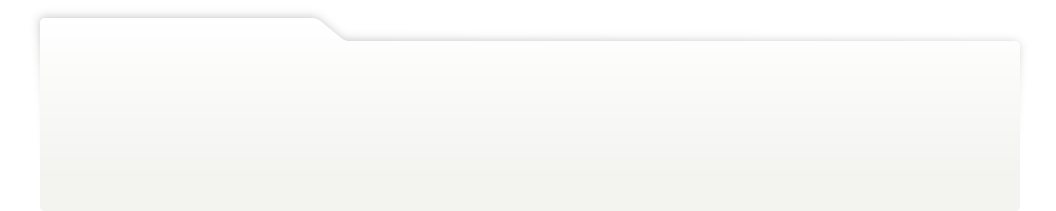
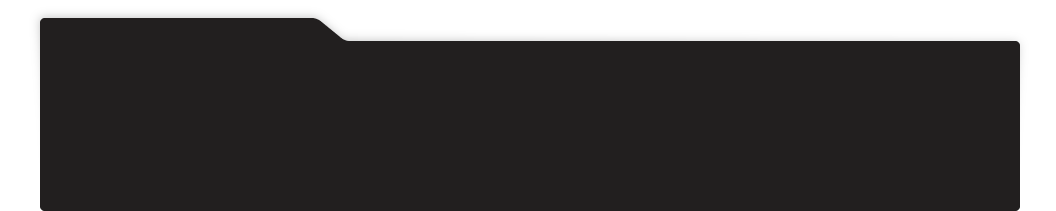
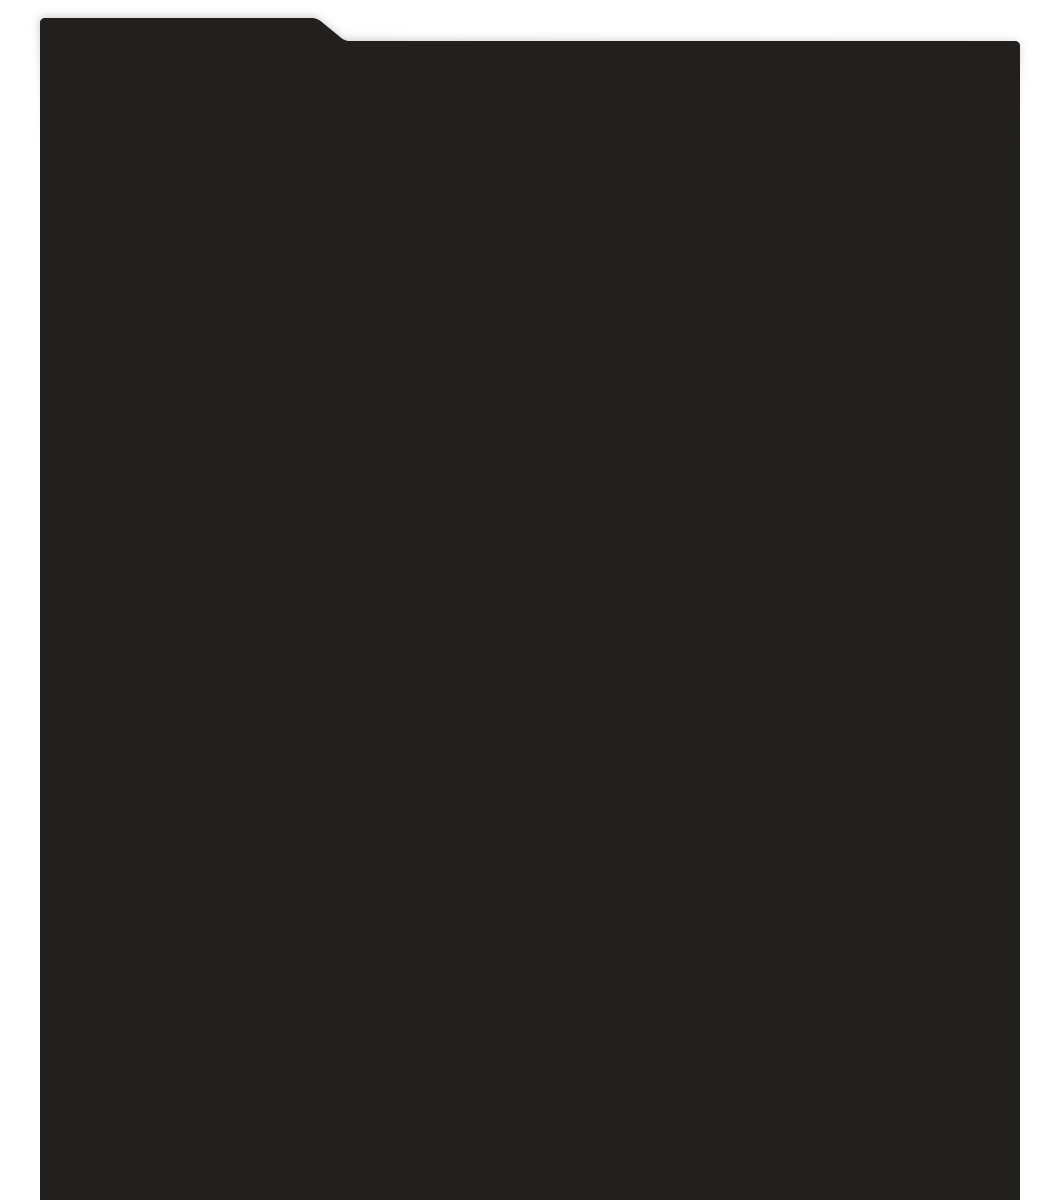
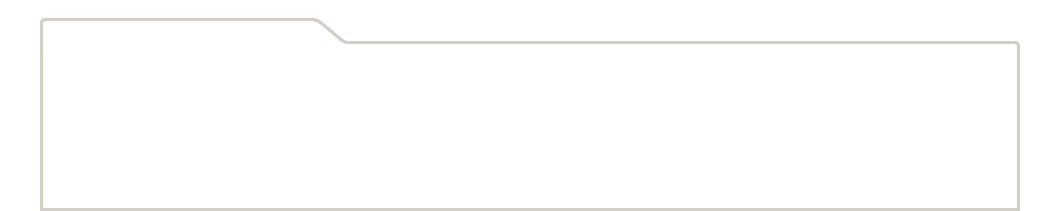
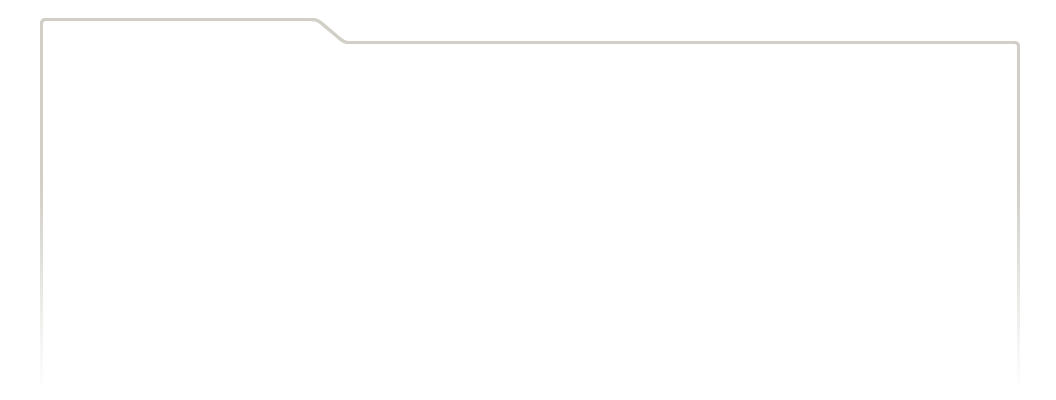
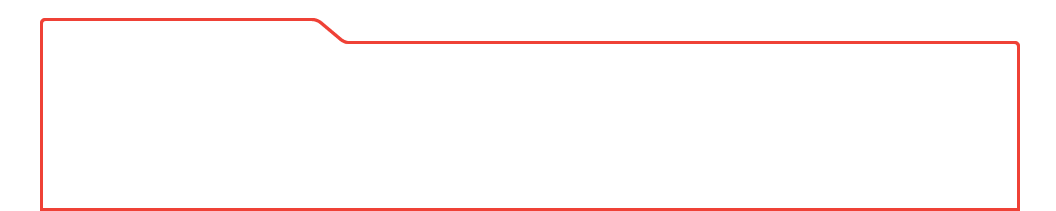
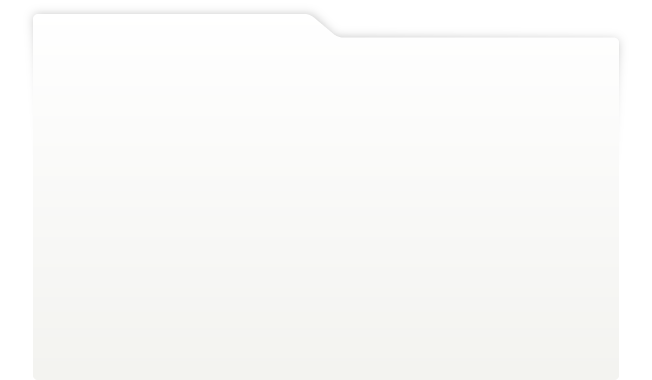
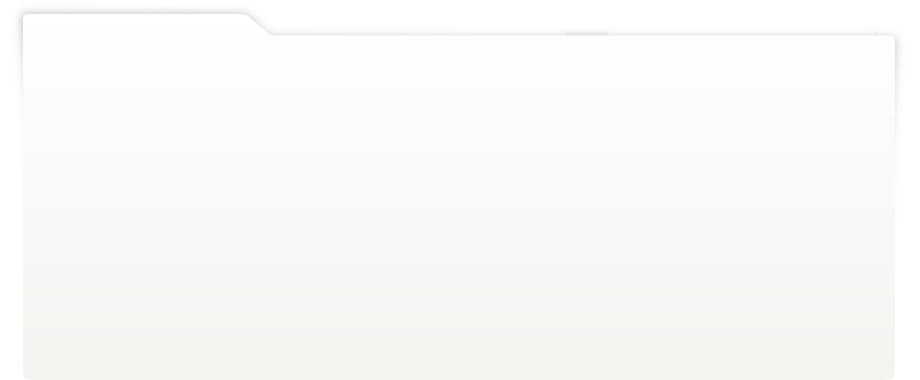
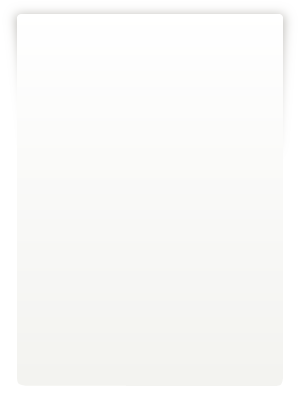
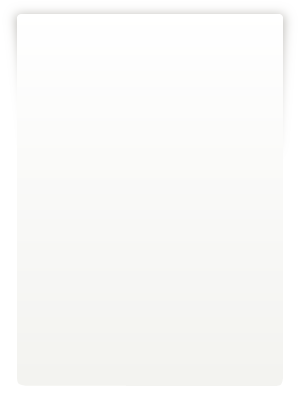
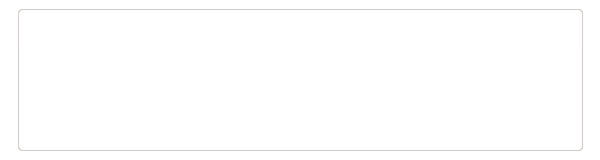
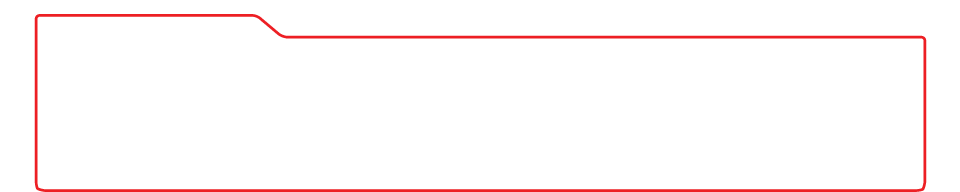
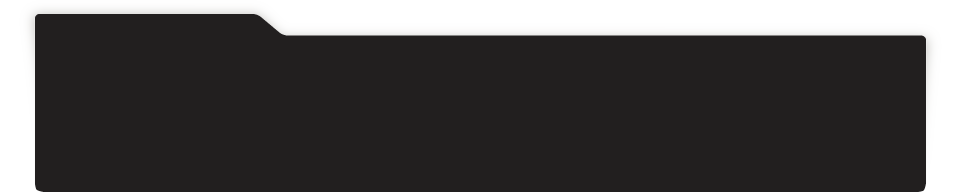
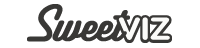
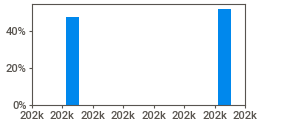
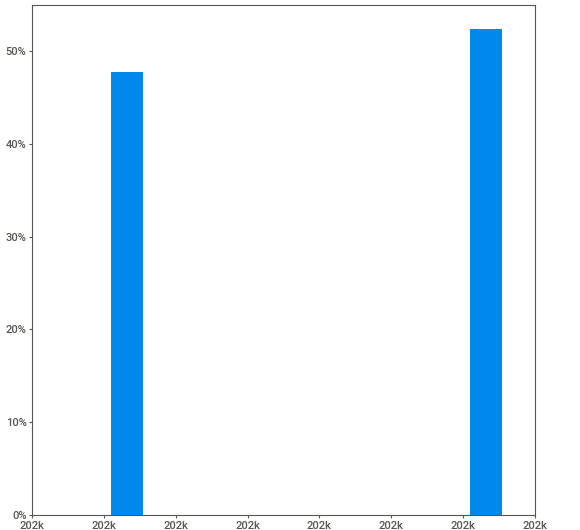
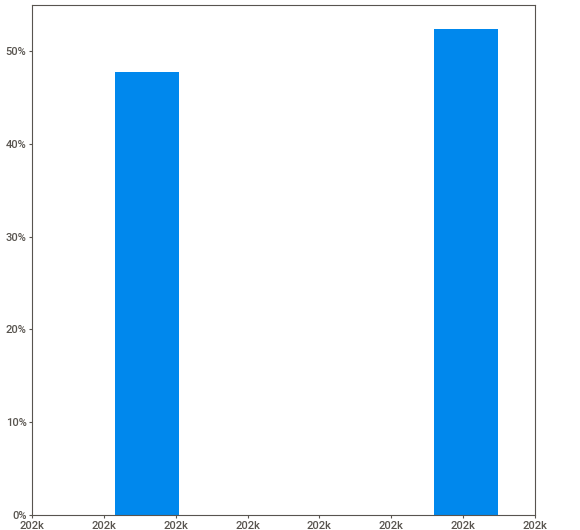
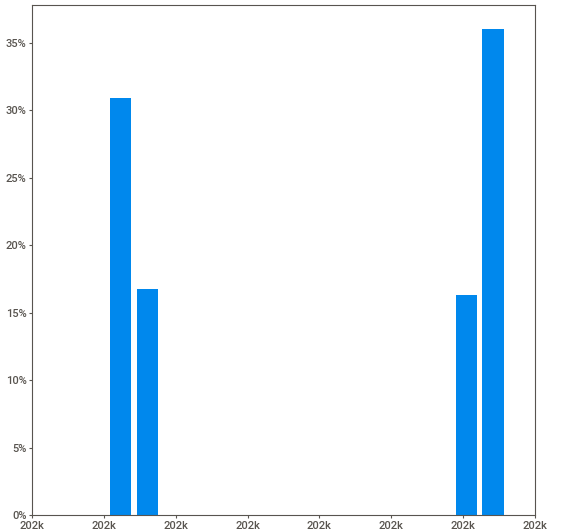
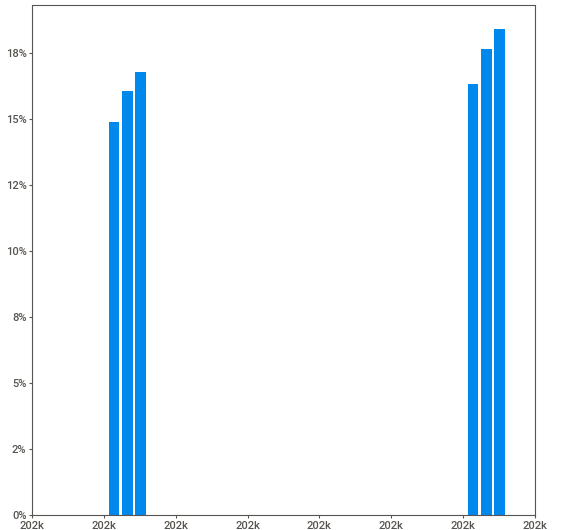
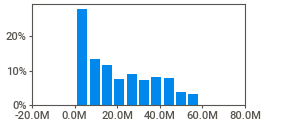
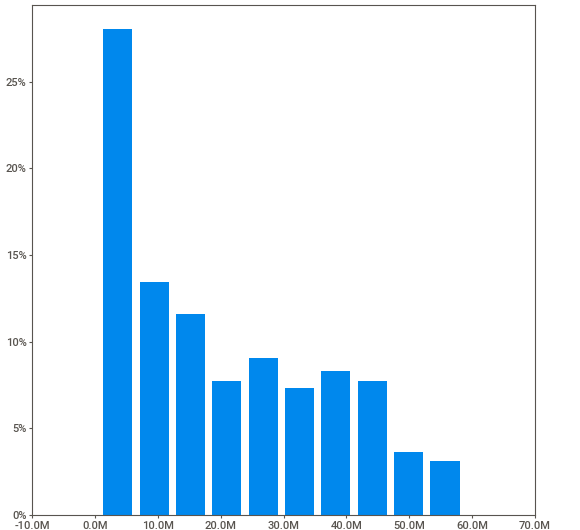
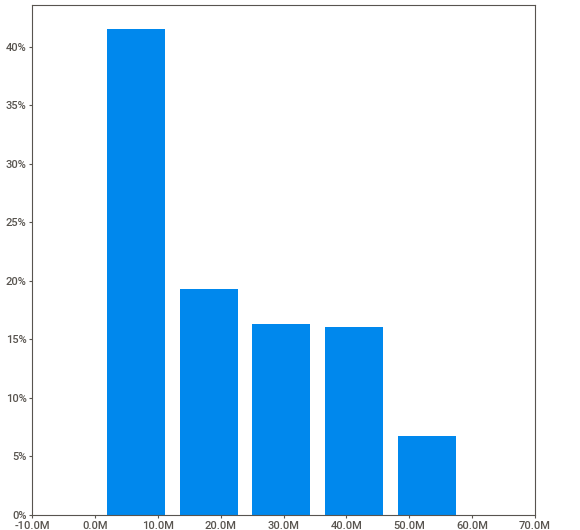
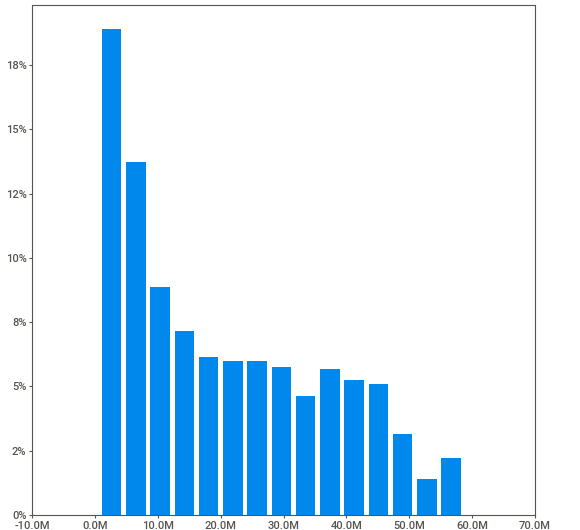
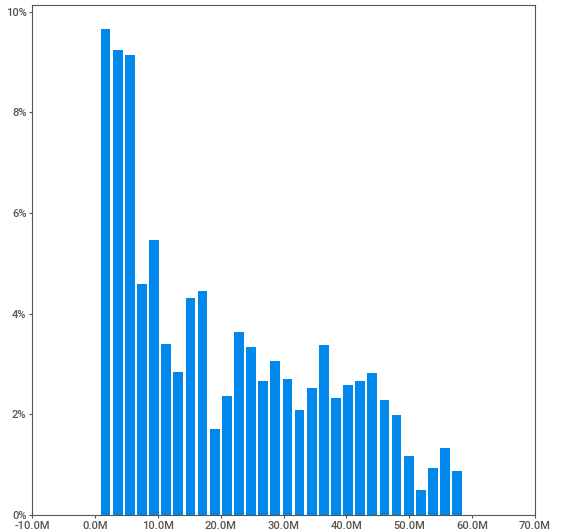
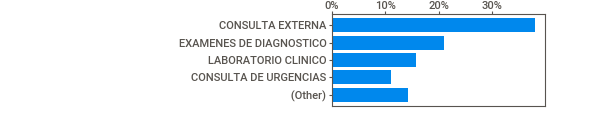
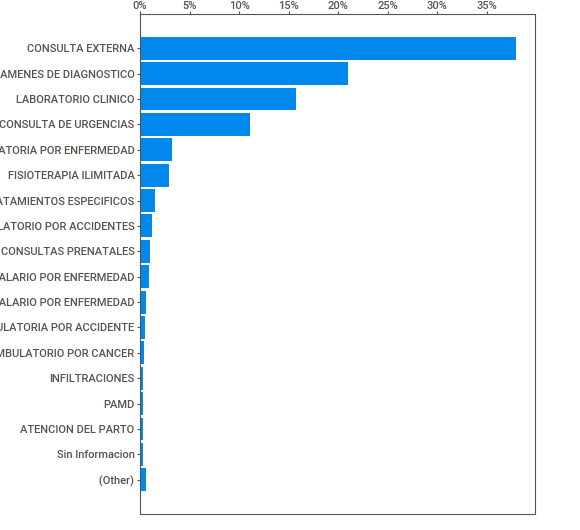
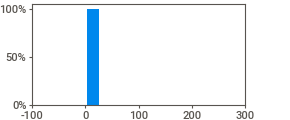
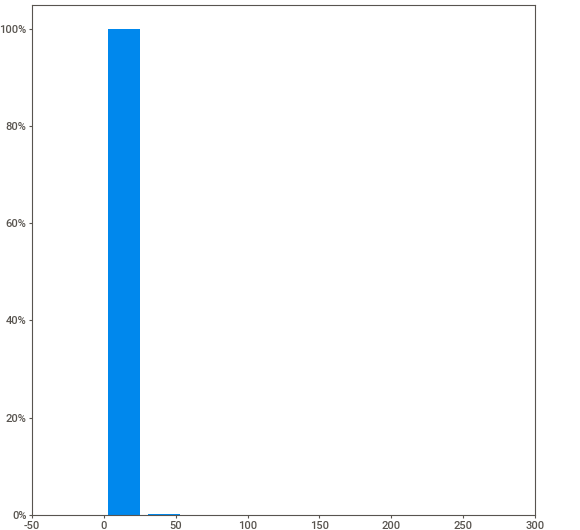
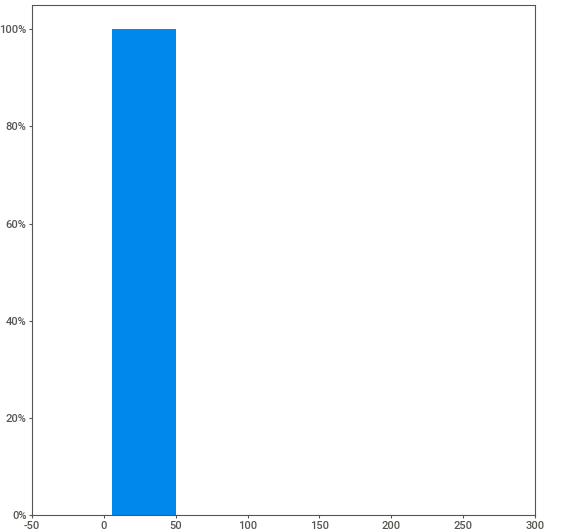
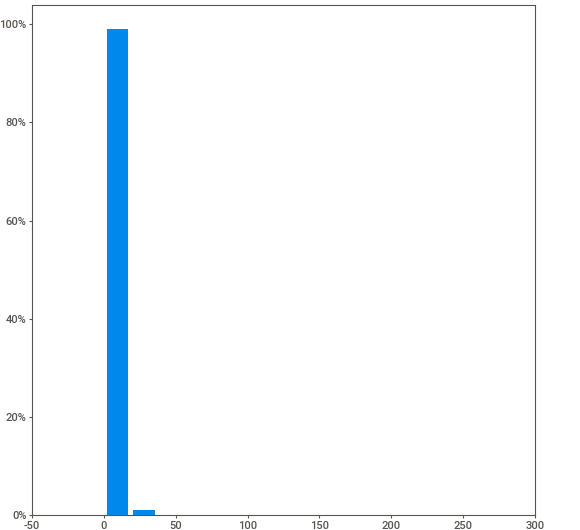
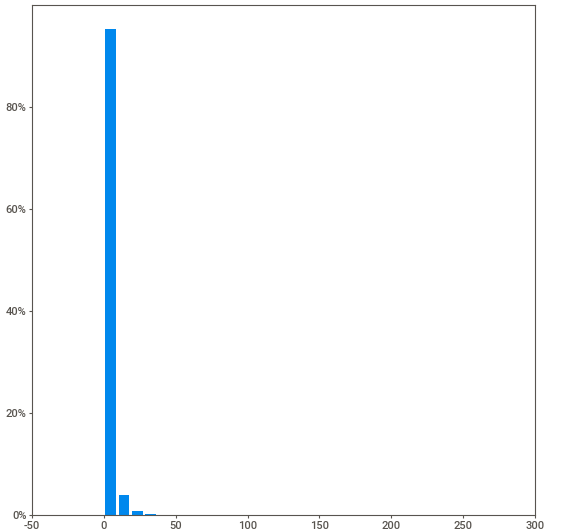
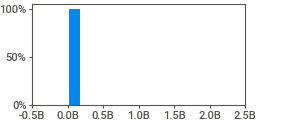
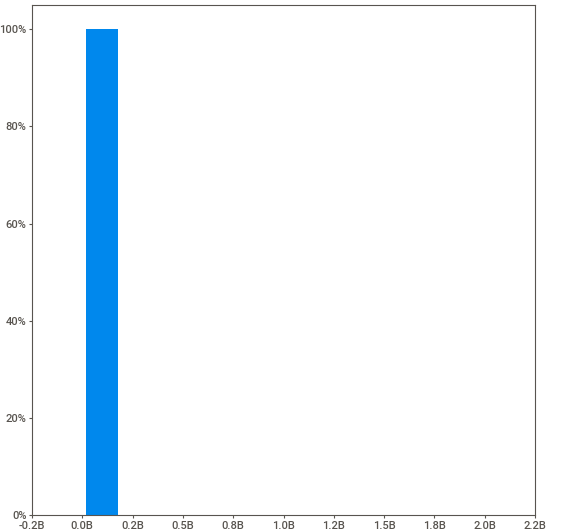
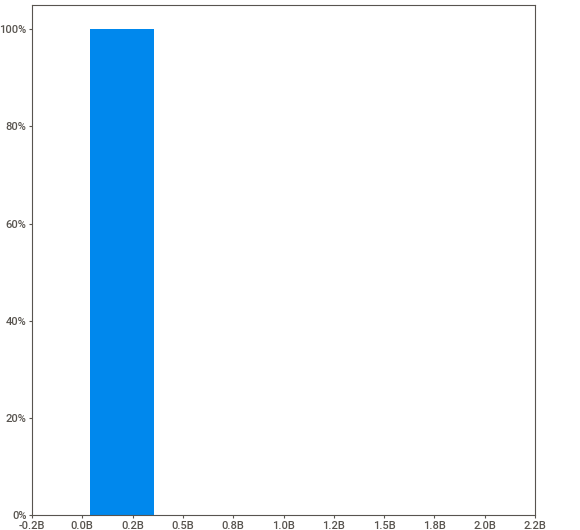
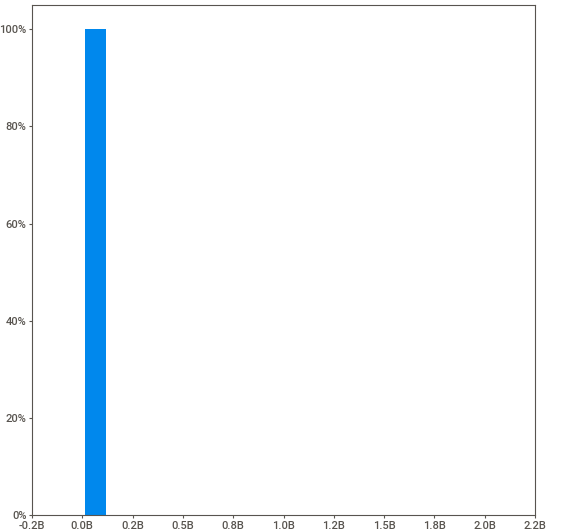
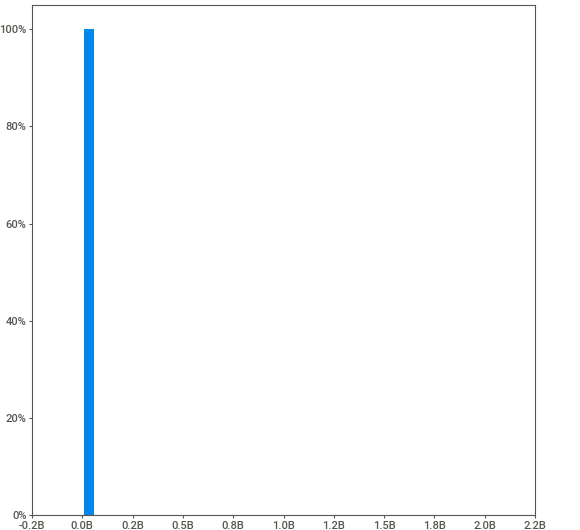
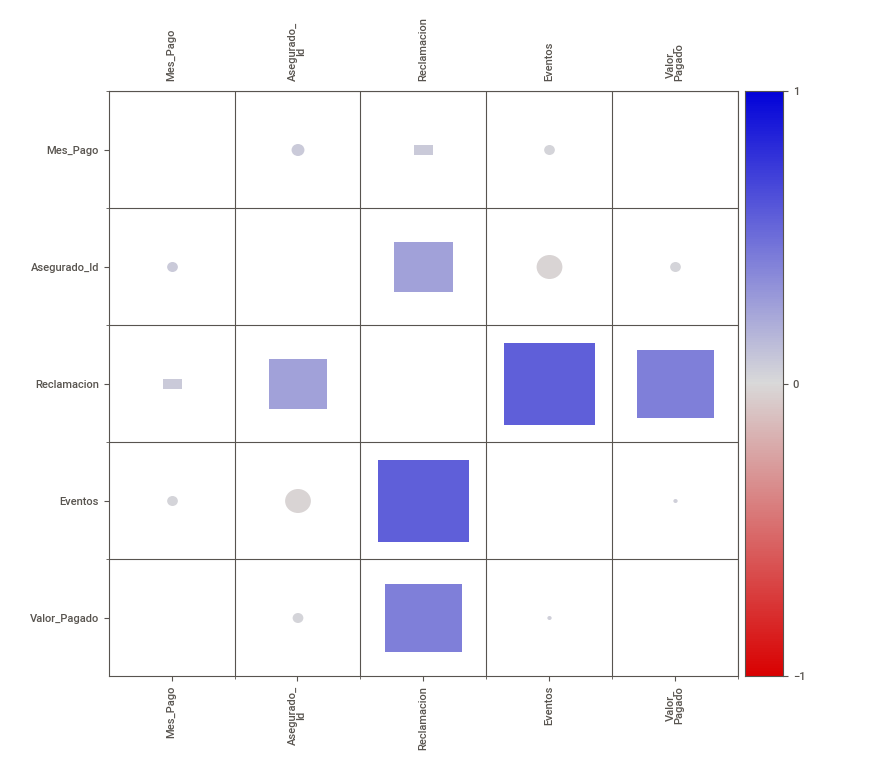
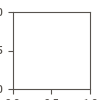

In [ ]:
#Exploración rápida de las variables de la base de siniestros
rgd = sv.analyze(bd_siniestros)
rgd.show_notebook()

Finalmente, en esta exploración inicial, para la base de siniestros, se tiene 3308480 registros distribuidos en 24 meses que se entregan como año mes en números, por lo que se realizará la separación en meses y en años.
- Se tiene la variable de reclamación que muestra el tipo de servicio solicitado por el asegurado, con 41 tipos diferentes de reclamación donde el 38% de los casos es por consulta externa, seguido de exámenes de diagnóstico con el 21%.
- Se muestra el código del diagnóstico, en total 5830 códigos diferentes, donde el 83% es "9", que pertenece a "Diagnóstico pendiente" de acuerdo con la siguiente variable que es el nombre como tal del diagnóstico. Se observa que hay algunos inconvenientes con la escritura de algunas categorías que llevan tilde, pero no afecta mayormente la comprensión. Se tiene 5830 diagnósticos de nombre diferente.
- La variable de Eventos, muestra la cantidad de eventos por asegurado, la mayoría de ellos solo tienen un evento registrado, representando el 70.4% de los casos. Se muestra un máximo de eventos por asegurado, de 279 con menos del 1% de los casos.
- El valor pagado se muestra en billones, la gran mayoría está alrededor de 0,1 billones, es decir, 100 millones. Hay un 3% de los datos que está en 97,88 millones.


##Base final - consolidada

In [ ]:
#Vamos a unir esta base de datos con la anterior para consolidar toda la información.
 # Unir las tablas por la columna Asegurado_Id
base_final = pd.merge(bd_siniestros, BD_EXP_SOCIOD, on='Asegurado_Id', how='inner')

In [ ]:
#VERIFICAMOS LAS CARACTERÍSTICAS DE LA BASE FINAL

print('Existen en total ', len(base_final.columns), 'columnas en la base de datos.')
print("\nPrimeras filas de la base final:")
print(base_final.head())

print("\nInformación de la base final:")
print(base_final.info())

# Ordenar las columnas por cantidad de datos nulos de mayor a menor
print("Variables con  datos nulos:")
sorted_null_values = base_final.isnull().sum().sort_values(ascending=False)

# Mostrar los resultados
print(sorted_null_values)


# Verificar si todos los valores en la columna 'Asegurado_Id' son únicos
if base_final['Asegurado_Id'].nunique() == base_final.shape[0]:
    print("Todos los valores en la columna 'Asegurado_Id' son únicos.")
else:
    print("Hay valores duplicados en la columna 'Asegurado_Id'.")

Existen en total  19 columnas en la base de datos.

Primeras filas de la base final:
   Mes_Pago  Asegurado_Id              Reclamacion Diagnostico_Codigo  \
0    201803       4834968  EXAMENES DE DIAGNOSTICO               Z011   
1    201804       4834968      LABORATORIO CLINICO                  9   
2    201803       4834968         CONSULTA EXTERNA                  9   
3    201805       4834968  EXAMENES DE DIAGNOSTICO                  9   
4    201811       4834968         CONSULTA EXTERNA                  9   

                     Diagnostico_Desc  Eventos   Valor_Pagado  \
0  EXAMEN DE OÃDOS Y DE LA AUDICIÃN        1  495341.335642   
1              DIAGNÃSTICO PENDIENTE       15  717708.276982   
2              DIAGNÃSTICO PENDIENTE        1  427837.347642   
3              DIAGNÃSTICO PENDIENTE        1  496955.561442   
4              DIAGNÃSTICO PENDIENTE        2  523223.417642   

   Poliza_Asegurado_Id FECHA_INICIO FECHA_CANCELACION  FECHA_FIN  Mujer  \
0         

Hay valores duplicados con el Id de asegurado, sin embargo, esto es posible, dado que una misma persona puede tener varias reclamaciones por diferentes motivos, se puede calcular por ejemplo, el valor pagado por persona.

#Transformación de los datos

In [ ]:
#Como las celdas vacías de fecha de cancelación son bastantes, vamos a crear una variable binaria que muestre 1 para cuando se da cancelación y 0 cuando no se da cancelación.

# Crear la variable binaria 'Cancelación'
base_final['Cancelación'] = base_final['FECHA_CANCELACION'].apply(lambda x: 0 if pd.isna(x) else 1)

# Mostrar las primeras filas para verificar los cambios
print(base_final.head())

   Mes_Pago  Asegurado_Id              Reclamacion Diagnostico_Codigo  \
0    201803       4834968  EXAMENES DE DIAGNOSTICO               Z011   
1    201804       4834968      LABORATORIO CLINICO                  9   
2    201803       4834968         CONSULTA EXTERNA                  9   
3    201805       4834968  EXAMENES DE DIAGNOSTICO                  9   
4    201811       4834968         CONSULTA EXTERNA                  9   

                     Diagnostico_Desc  Eventos   Valor_Pagado  \
0  EXAMEN DE OÃDOS Y DE LA AUDICIÃN        1  495341.335642   
1              DIAGNÃSTICO PENDIENTE       15  717708.276982   
2              DIAGNÃSTICO PENDIENTE        1  427837.347642   
3              DIAGNÃSTICO PENDIENTE        1  496955.561442   
4              DIAGNÃSTICO PENDIENTE        2  523223.417642   

   Poliza_Asegurado_Id FECHA_INICIO FECHA_CANCELACION  FECHA_FIN  Mujer  \
0             95576925   2018-01-01        2019-12-31 2019-12-31      0   
1             955769

In [ ]:
#Crear la variable edad a partir de la fecha de nacimiento, con respecto al 31 de diciembre de 2019.
# Convertir la columna 'FechaNacimiento' al formato de fecha
base_final['FechaNacimiento'] = pd.to_datetime(base_final['FechaNacimiento'], format='%d/%m/%Y')

# Calcular la edad al 31 de diciembre de 2019
fecha_referencia = datetime(2019, 12, 31)
base_final['Edad'] = base_final['FechaNacimiento'].apply(lambda x: fecha_referencia.year - x.year - ((fecha_referencia.month, fecha_referencia.day) < (x.month, x.day)))

# Mostrar las primeras filas para verificar los resultados
print(base_final.head())

   Mes_Pago  Asegurado_Id              Reclamacion Diagnostico_Codigo  \
0    201803       4834968  EXAMENES DE DIAGNOSTICO               Z011   
1    201804       4834968      LABORATORIO CLINICO                  9   
2    201803       4834968         CONSULTA EXTERNA                  9   
3    201805       4834968  EXAMENES DE DIAGNOSTICO                  9   
4    201811       4834968         CONSULTA EXTERNA                  9   

                     Diagnostico_Desc  Eventos   Valor_Pagado  \
0  EXAMEN DE OÃDOS Y DE LA AUDICIÃN        1  495341.335642   
1              DIAGNÃSTICO PENDIENTE       15  717708.276982   
2              DIAGNÃSTICO PENDIENTE        1  427837.347642   
3              DIAGNÃSTICO PENDIENTE        1  496955.561442   
4              DIAGNÃSTICO PENDIENTE        2  523223.417642   

   Poliza_Asegurado_Id FECHA_INICIO FECHA_CANCELACION  ... Mujer  \
0             95576925   2018-01-01        2019-12-31  ...     0   
1             95576925   2018-01-0

In [ ]:
# Extraer mes y año de pago
# Convertir la columna Mes_Pago a tipo datetime
base_final['Mes_Pago'] = pd.to_datetime(base_final['Mes_Pago'], format='%Y%m')

# Extraer el mes y el año por separado
base_final['Mes pago'] = base_final['Mes_Pago'].dt.month
base_final['Año pago'] = base_final['Mes_Pago'].dt.year

# Mostrar las primeras filas para verificar los resultados
print(base_final[['Mes_Pago', 'Mes pago', 'Año pago']].head())

    Mes_Pago  Mes pago  Año pago
0 2018-03-01         3      2018
1 2018-04-01         4      2018
2 2018-03-01         3      2018
3 2018-05-01         5      2018
4 2018-11-01        11      2018


In [ ]:
# Calcular la duración de la cobertura de salud - se calcula restando la fecha de cancelación (o la fecha de finalización de la póliza si no se ha cancelado) de la fecha de finalización de la póliza
# Rellenar los valores faltantes en FECHA_CANCELACION con la fecha de finalización de la póliza
base_final['FECHA_CANCELACION'].fillna(base_final['FECHA_FIN'], inplace=True)

# Calcular la duración de la cobertura de salud
base_final['Duracion_Cobertura'] = (base_final['FECHA_CANCELACION'] - base_final['FECHA_INICIO']).dt.days

print(base_final[['FECHA_INICIO','FECHA_CANCELACION', 'FECHA_FIN', 'Duracion_Cobertura']].head())

  FECHA_INICIO FECHA_CANCELACION  FECHA_FIN  Duracion_Cobertura
0   2018-01-01        2019-12-31 2019-12-31                 729
1   2018-01-01        2019-12-31 2019-12-31                 729
2   2018-01-01        2019-12-31 2019-12-31                 729
3   2018-01-01        2019-12-31 2019-12-31                 729
4   2018-01-01        2019-12-31 2019-12-31                 729


In [ ]:
# Calcular el número total de reclamaciones por asegurado
reclamaciones_por_asegurado = base_final.groupby('Asegurado_Id')['Eventos'].sum()
print(reclamaciones_por_asegurado)

Asegurado_Id
738284       22
738288       24
738294       19
738303       46
738318      159
           ... 
58581352    114
58581939     20
58581989      1
58584529     10
58584580     23
Name: Eventos, Length: 235442, dtype: int64


In [ ]:
# Calcular el costo promedio por reclamación
base_final = base_final[base_final['Eventos'] > 0]
base_final['Costo_Reclamacion'] = base_final['Valor_Pagado'] /base_final['Eventos']

print(base_final.head())

    Mes_Pago  Asegurado_Id              Reclamacion Diagnostico_Codigo  \
0 2018-03-01       4834968  EXAMENES DE DIAGNOSTICO               Z011   
1 2018-04-01       4834968      LABORATORIO CLINICO                  9   
2 2018-03-01       4834968         CONSULTA EXTERNA                  9   
3 2018-05-01       4834968  EXAMENES DE DIAGNOSTICO                  9   
4 2018-11-01       4834968         CONSULTA EXTERNA                  9   

                     Diagnostico_Desc  Eventos   Valor_Pagado  \
0  EXAMEN DE OÃDOS Y DE LA AUDICIÃN        1  495341.335642   
1              DIAGNÃSTICO PENDIENTE       15  717708.276982   
2              DIAGNÃSTICO PENDIENTE        1  427837.347642   
3              DIAGNÃSTICO PENDIENTE        1  496955.561442   
4              DIAGNÃSTICO PENDIENTE        2  523223.417642   

   Poliza_Asegurado_Id FECHA_INICIO FECHA_CANCELACION  ... EPOC  DIABETES  \
0             95576925   2018-01-01        2019-12-31  ...    0         1   
1         

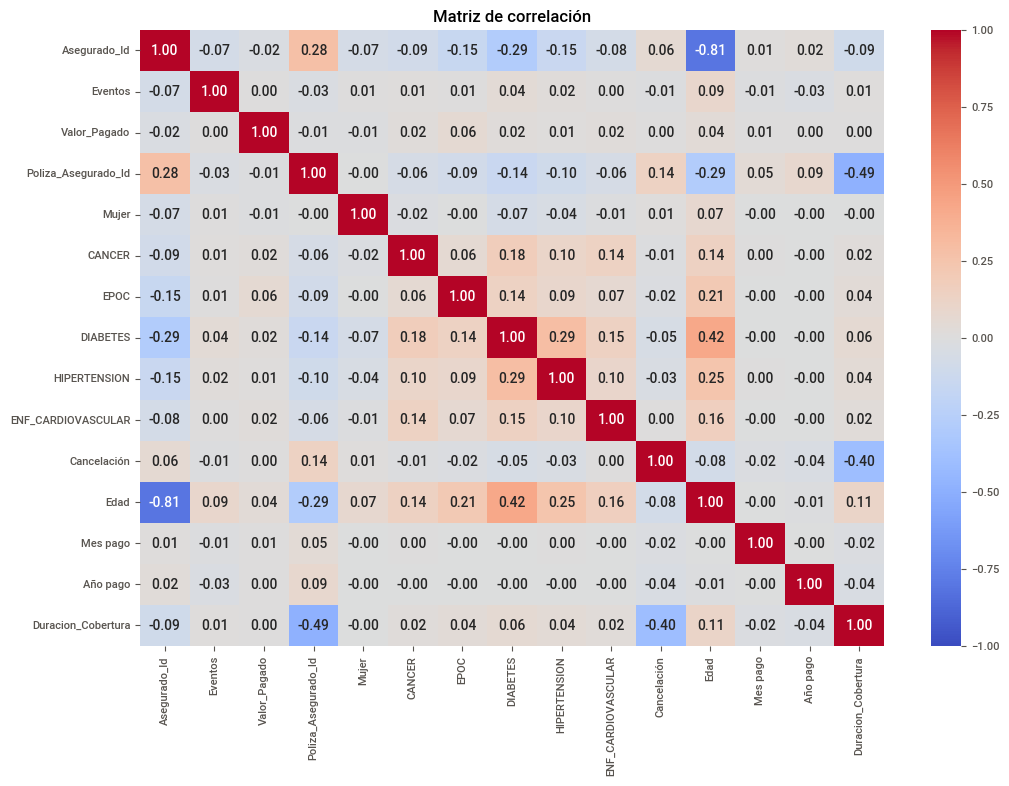

In [ ]:
# Veamos un análisis de correlación
# variables numéricas
numericas = base_final.select_dtypes(include=['int64','int32', 'float64'])

# Calcula la matriz de correlación
correlation_matrix = numericas.corr()

# Visualización
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.title('Matriz de correlación')
plt.show()

Se observa que la correlación positiva más alta es entre la edad y la diabetes con 0.42. También se da entre la edad y la hipertensión (0.25), EPOC (0.21), enfermedad cardiovascular (0.16) y cáncer (0.14). También entre hipertensión y diabetes (0.29), entre cáncer y diabetes (0.18).
En cuanto a correlaciones negativas, se tiene como se espera entre duración y cancelación de la póliza.

#Análisis exploratorio con variable objetivo

In [ ]:
# Estadísticas descriptivas de la variable objetivo
print("Estadísticas descriptivas de Valor_Pagado:")
print(base_final['Valor_Pagado'].describe())
print("Estadísticas descriptivas de Costo_Reclamacion:")
print(base_final['Costo_Reclamacion'].describe())

Estadísticas descriptivas de Valor_Pagado:
count    3.778234e+06
mean     8.017543e+05
std      2.910020e+06
min      1.020000e+05
25%      4.346523e+05
50%      4.844292e+05
75%      6.315640e+05
max      1.977986e+09
Name: Valor_Pagado, dtype: float64
Estadísticas descriptivas de Costo_Reclamacion:
count    3.778234e+06
mean     6.575544e+05
std      2.854064e+06
min      2.293891e+03
25%      3.210446e+05
50%      4.351747e+05
75%      5.028255e+05
max      1.977986e+09
Name: Costo_Reclamacion, dtype: float64


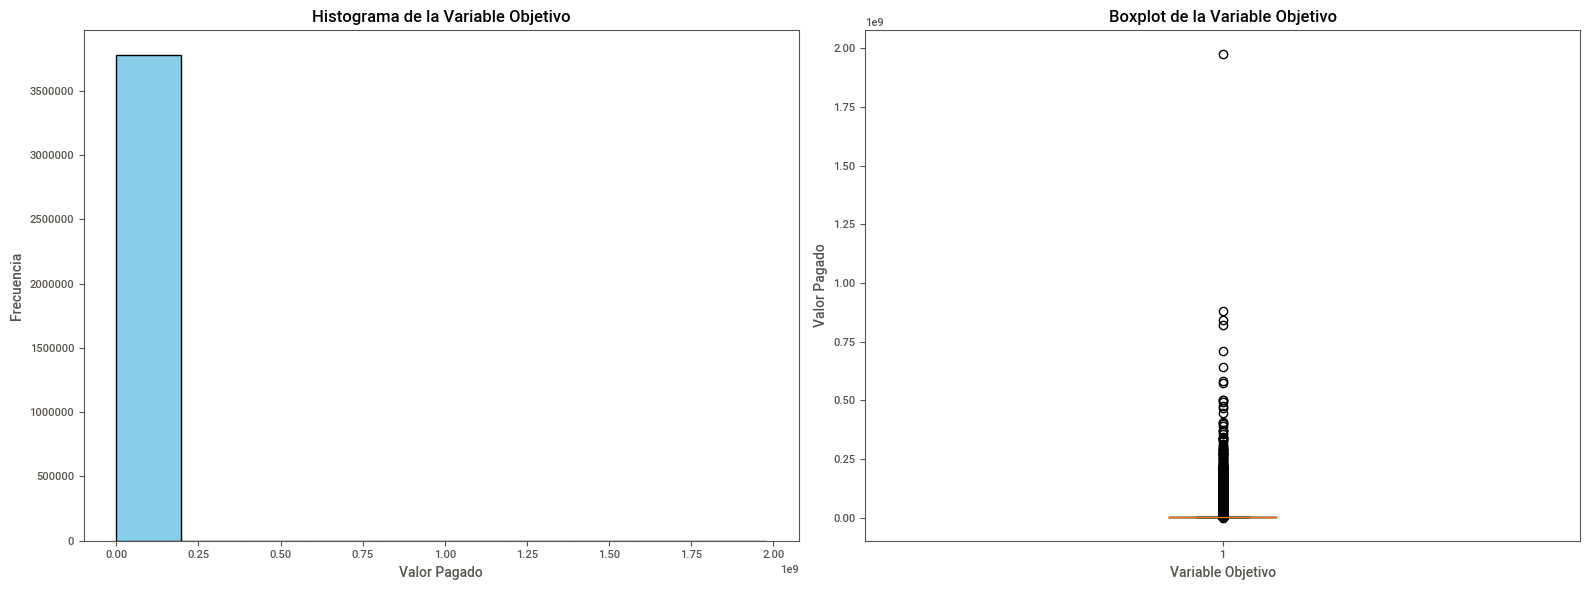

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(16, 6))

# Graficar el histograma de distribución de la variable objetivo
ax[0].hist(base_final['Valor_Pagado'], bins=10, color='skyblue', edgecolor='black')
ax[0].set_xlabel('Valor Pagado')
ax[0].set_ylabel('Frecuencia')
ax[0].set_title('Histograma de la Variable Objetivo')

# Graficar el boxplot de la variable objetivo
ax[1].boxplot(base_final['Valor_Pagado'])
ax[1].set_xlabel('Variable Objetivo')
ax[1].set_ylabel('Valor Pagado')
ax[1].set_title('Boxplot de la Variable Objetivo')

# Ajustar el diseño
plt.tight_layout()

# Mostrar la figura
plt.show()

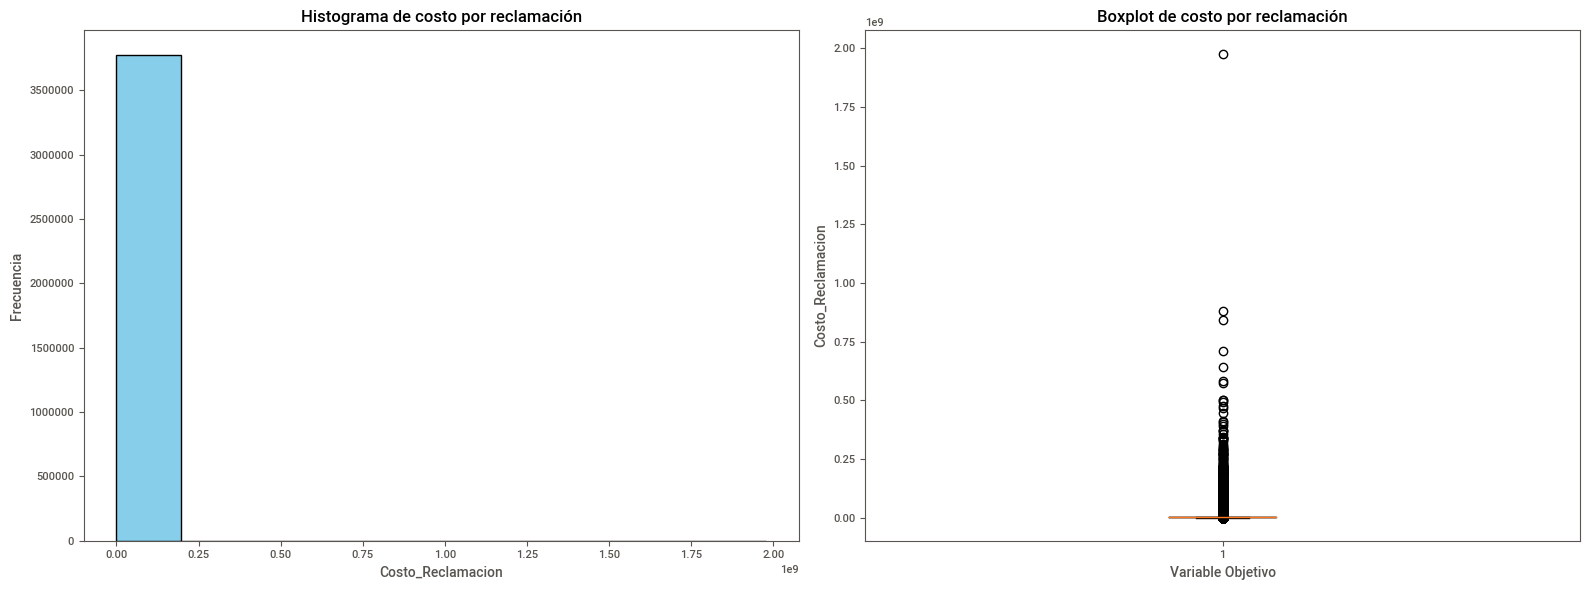

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(16, 6))

# Graficar el histograma de distribución de costo por reclamación
ax[0].hist(base_final['Costo_Reclamacion'], bins=10, color='skyblue', edgecolor='black')
ax[0].set_xlabel('Costo_Reclamacion')
ax[0].set_ylabel('Frecuencia')
ax[0].set_title('Histograma de costo por reclamación')

# Graficar el boxplot de costo por reclamación
ax[1].boxplot(base_final['Costo_Reclamacion'])
ax[1].set_xlabel('Variable Objetivo')
ax[1].set_ylabel('Costo_Reclamacion')
ax[1].set_title('Boxplot de costo por reclamación')

# Ajustar el diseño
plt.tight_layout()

# Mostrar la figura
plt.show()

In [ ]:
#Hay un valor muy lejano a los datos por valor de 1.9 billones, revisemos la información asociada a este registro:

# Obtener el dato más alto de la variable Valor_Pagado
dato_mas_alto = base_final['Valor_Pagado'].max()

# Filtrar el DataFrame para obtener toda la información asociada al dato más alto
dato_mas_alto_info = base_final[base_final['Valor_Pagado'] == dato_mas_alto]

pd.set_option('display.max_colwidth', None) # Mostrar completo

# Mostrar la información del dato más alto de la variable Valor_Pagado
print("Información del dato más alto de la variable Valor_Pagado:")
print(dato_mas_alto_info)

Información del dato más alto de la variable Valor_Pagado:
          Mes_Pago  Asegurado_Id  \
1376929 2018-02-01      43091507   

                                                Reclamacion  \
1376929  TRATAMIENTO QUIRURGICO HOSPITALARIO POR ENFERMEDAD   

        Diagnostico_Codigo  \
1376929               G128   

                                                Diagnostico_Desc  Eventos  \
1376929  OTRAS ATROFIAS MUSCULARES ESPINALES Y SÃNDROMES AFINES        1   

         Valor_Pagado  Poliza_Asegurado_Id FECHA_INICIO FECHA_CANCELACION  \
1376929  1.977986e+09            159717423   2018-01-01        2018-05-22   

         ... CANCER  EPOC DIABETES HIPERTENSION  ENF_CARDIOVASCULAR  \
1376929  ...      0     0        0            0                   0   

         Cancelación  Edad  Mes pago  Año pago  Duracion_Cobertura  
1376929            1     2         2      2018                 141  

[1 rows x 24 columns]


La información relacionada muestra que este registro corresponde a una póliza cancelada antes de finalizar su vigencia. DEFINIR QUÉ HACER**********

<ipython-input-39-d075d2912f2a>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_xticklabels(['Hombre', 'Mujer'])


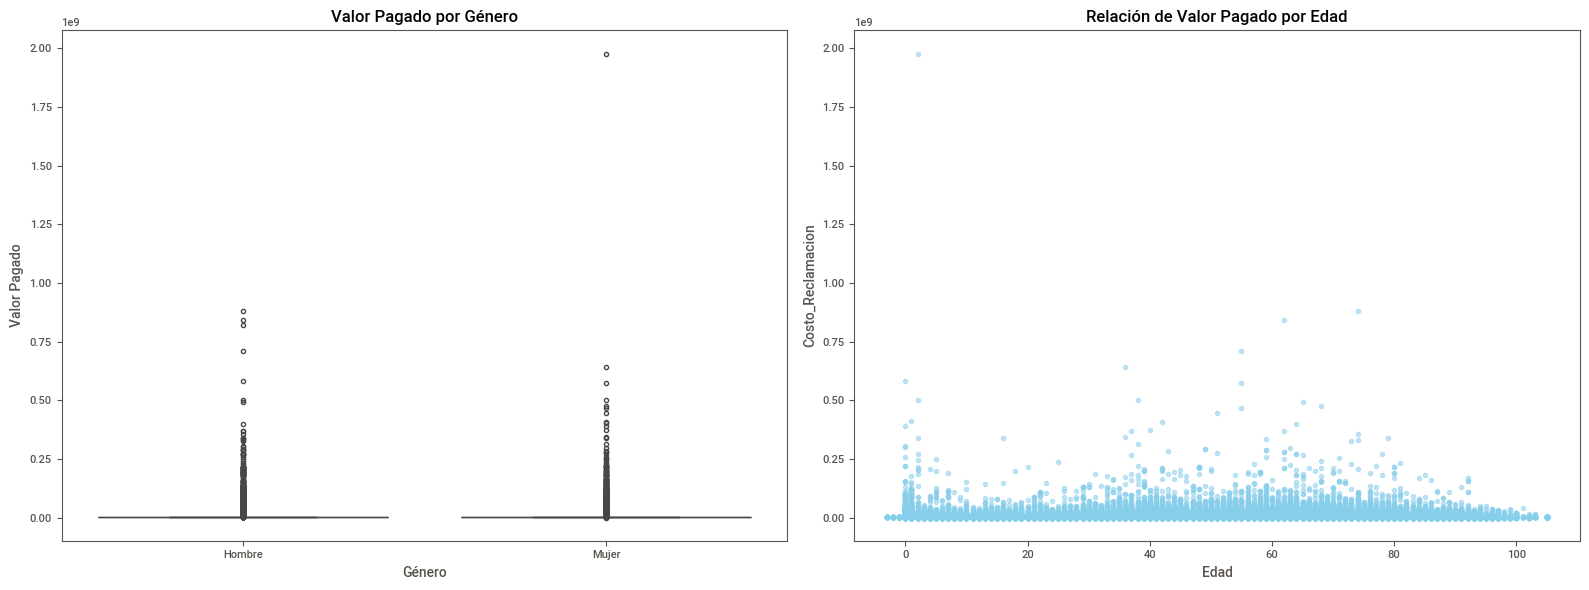

Mujer
Hombre    839317.523880
Mujer     779929.165723
Name: Valor_Pagado, dtype: float64


In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(16, 6))

# boxplot de valor promedio pagado por género
sns.boxplot(x='Mujer', y='Valor_Pagado', data=base_final, ax=ax[0])
ax[0].set_title('Valor Pagado por Género')
ax[0].set_xlabel('Género')
ax[0].set_ylabel('Valor Pagado')
ax[0].set_xticklabels(['Hombre', 'Mujer'])

# scatter plot de Edad vs Valor_Pagado
ax[1].scatter(base_final['Edad'], base_final['Valor_Pagado'], color='skyblue', alpha=0.5)
ax[1].set_title('Relación de Valor Pagado por Edad')
ax[1].set_xlabel('Edad')
ax[1].set_ylabel('Valor_Pagado')

# Ajustar el diseño
plt.tight_layout()

# Mostrar la figura
plt.show()

# Temporalmente asignar etiquetas adecuadas para calcular el promedio
promedio_por_genero = base_final.replace({'Mujer': {0: 'Hombre', 1: 'Mujer'}}).groupby('Mujer')['Valor_Pagado'].mean()

# Imprimir el resultado
print(promedio_por_genero)

Se observa que los valores más altos pagados se da con los asegurados de género masculino.
La relación entre edad y valor pagado es muy baja, ya que no se observa alguna tendencia.

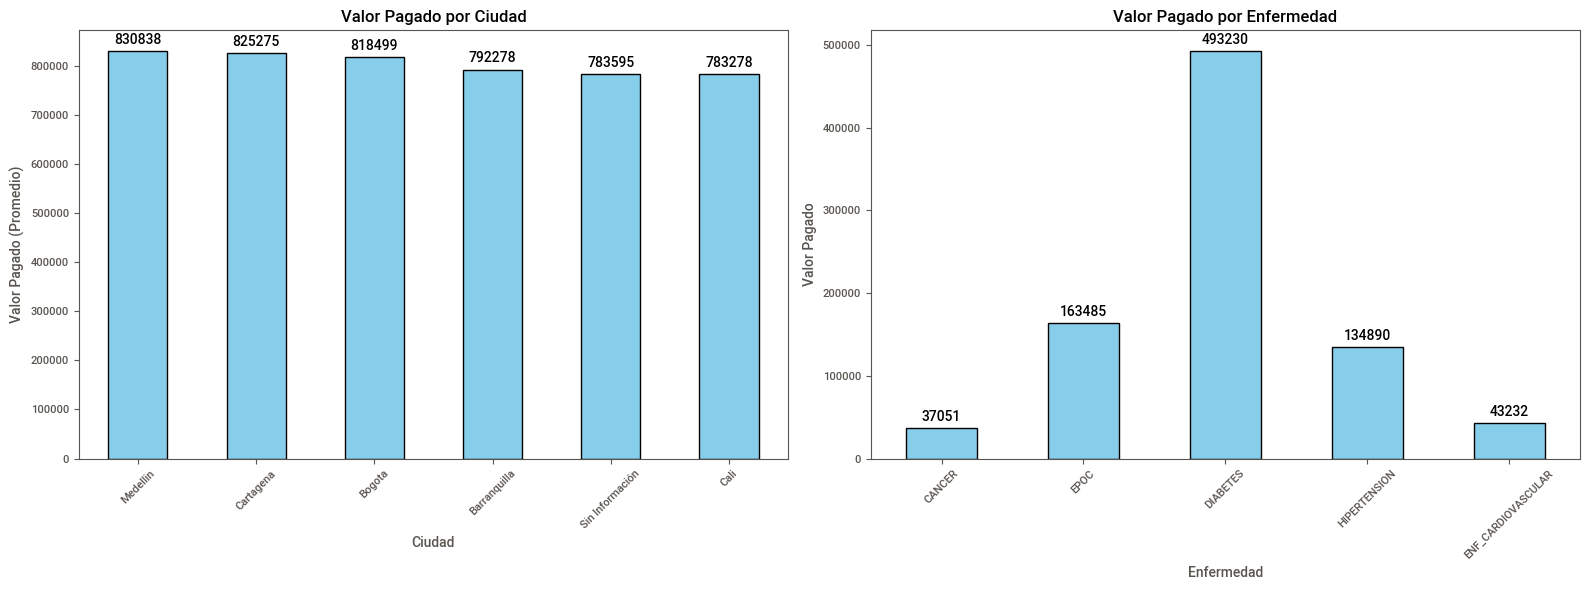

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(16, 6))

# Gráfico de barras de valor promedio pagado por ciudad
city_grouped = base_final.groupby('Ciudad')['Valor_Pagado'].mean().sort_values(ascending=False)
bars1 = city_grouped.plot(kind='bar', stacked=True, color='skyblue', edgecolor='black', ax=axs[0])

# Añadir etiquetas a cada barra en el primer gráfico
for bar in bars1.patches:
    height = bar.get_height()
    axs[0].annotate(f'{height:.0f}',  # Cambiar a .0f para cero decimales
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 puntos de desplazamiento vertical
                    textcoords="offset points",
                    ha='center', va='bottom')

# Configuración de títulos y etiquetas de los ejes para el primer gráfico
axs[0].set_title('Valor Pagado por Ciudad')
axs[0].set_xlabel('Ciudad')
axs[0].set_ylabel('Valor Pagado (Promedio)')
axs[0].tick_params(axis='x', rotation=45)

# Gráfico de barras para el valor pagado por enfermedad
valores_por_enfermedad = base_final[['CANCER', 'EPOC', 'DIABETES', 'HIPERTENSION', 'ENF_CARDIOVASCULAR']].sum()
bars2 = valores_por_enfermedad.plot(kind='bar', color='skyblue', edgecolor='black', ax=axs[1])

# Añadir etiquetas a cada barra en el segundo gráfico
for bar in bars2.patches:
    height = bar.get_height()
    axs[1].annotate(f'{height:.0f}',  # Mostrar valores sin decimales
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # Desplazamiento vertical de 3 puntos
                    textcoords="offset points",
                    ha='center', va='bottom')

# Configuración de títulos y etiquetas de los ejes para el segundo gráfico
axs[1].set_title('Valor Pagado por Enfermedad')
axs[1].set_xlabel('Enfermedad')
axs[1].set_ylabel('Valor Pagado')
axs[1].tick_params(axis='x', rotation=45)

# Mostrar la figura
plt.tight_layout()
plt.show()

En cuanto al valor pagado por ciudad, se tiene que es muy similar entre las diferentes opciones, sin embargo predomina Medellín con una ligera diferencia.
Al revisar el valor pagado por enfermedad, se observa que los valores más altos pagados para segurados que tengan enfermedades, ha sido para diabetes en primer lugar y EPOC en segundo lugar con una gran diferencia de valores.

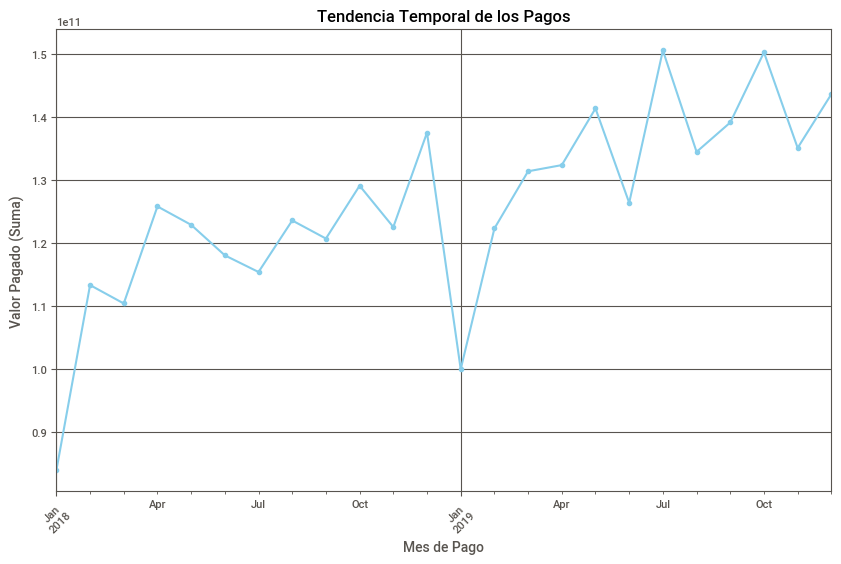

In [ ]:
# Gráfico de líneas para analizar la tendencia temporal de la variable objetivo
plt.figure(figsize=(10, 6))
monthly_payments = base_final.groupby('Mes_Pago')['Valor_Pagado'].sum()
monthly_payments.plot(kind='line', marker='o', color='skyblue')
plt.title('Tendencia Temporal de los Pagos')
plt.xlabel('Mes de Pago')
plt.ylabel('Valor Pagado (Suma)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

El comportamiento de la variable objetivo en el tiempo, muestra que ha venido aumentando a lo largo del tiempo, se tuvo una reducción drástica en enero de 2019 y luego volvió a subir.

<Axes: xlabel='Edad', ylabel='Valor_Pagado'>

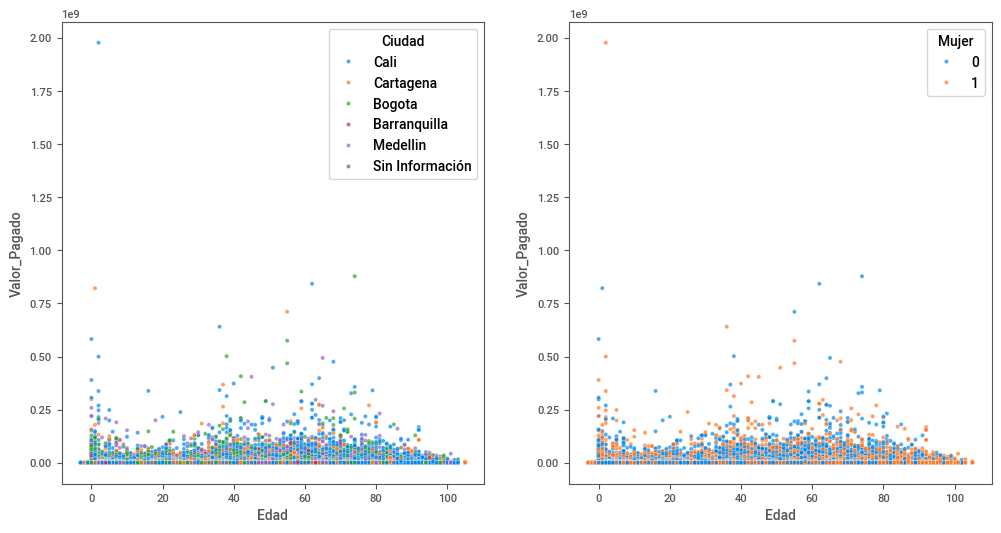

In [ ]:
fig, axs=plt.subplots(nrows=1, ncols=2, figsize=(12,6))
sns.scatterplot(x='Edad', y='Valor_Pagado', hue='Ciudad', data= base_final, ax= axs[0], alpha=.7)
sns.scatterplot(x='Edad', y='Valor_Pagado', hue='Mujer', data= base_final, ax= axs[1], alpha=.7)

In [ ]:
#Exportamos la base
base_final.to_csv('base_final.txt', sep='\t', index=False)